In [481]:
import sys
import numpy
import pandas
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from n2lite import n2lite
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['font.size'] = 24

In [482]:
d = n2lite.N2lite('/home/amigos/data/sql/sisiv/20181122_063958/param.db')
D = d.read_pandas_all()

In [483]:
beam_list = [
    '2l', '2r', '3l', '3r',
    '4l', '4r', '5l', '5r', 
    '1lu', '1ll', '1ru', '1rl'
]

In [484]:
_voltage = [D['sis_vol_{}'.format(beam)] for beam in beam_list]
_current = [D['sis_cur_{}'.format(beam)] for beam in beam_list]

In [485]:
# set tuning param

first_voltage = numpy.array([min(_vol) for _vol in _voltage])
last_voltage = numpy.array([max(_vol) for _vol in _voltage])
step = 0.01
roop = numpy.array([int((_last_vol - _first_vol) / step) + 1for _first_vol, _last_vol in zip(first_voltage, last_voltage)])
bins = numpy.array([numpy.arange(_first_vol, _last_vol + step, step) for _first_vol, _last_vol in zip(first_voltage, last_voltage)])
def set_flag(x, i):
    mask = step / 2
    for j in range(len(bins[i])):
        if x >= bins[i][j] - mask and x < bins[i][j] + mask: return j
        continue

In [486]:
df = pandas.DataFrame()
for i, beam in enumerate(beam_list):
    df['vol_{}'.format(beam)] = _voltage[i]
    df['cur_{}'.format(beam)] = _current[i]
    df['flag_{}'.format(beam)] = _voltage[i].apply(set_flag, args=(i,))

In [487]:
_idx = [
    [
        df['flag_{}'.format(beam)] [df['flag_{}'.format(beam)] == j].index
        for j in range(len(bins[i]))
        ]
    for i, beam in enumerate(beam_list)
]

idx = [
    [
        __idx for __idx in _idx[i] if __idx != []
    ]
    for i in range(len(beam_list))
]

voltage_all = [
    [
        [
            df['vol_{}'.format(beam)][__idx] 
            for __idx in _idx
        ] 
        for _idx in idx[i]
    ] 
    for i, beam in enumerate(beam_list)
]

current_all = [
    [
        [df['cur_{}'.format(beam)][__idx] 
         for __idx in _idx
        ] 
        for _idx in idx[i]
    ] 
    for i, beam in enumerate(beam_list)
]

voltage = [
    numpy.array([
        numpy.mean(_voltage_all) for _voltage_all in voltage_all[i]
    ]) 
    for i in range(len(beam_list))
]

current = [
    numpy.array([
        numpy.mean(_current_all) for _current_all in current_all[i]
    ])
    for i in range(len(beam_list))
]

/home/amigos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()


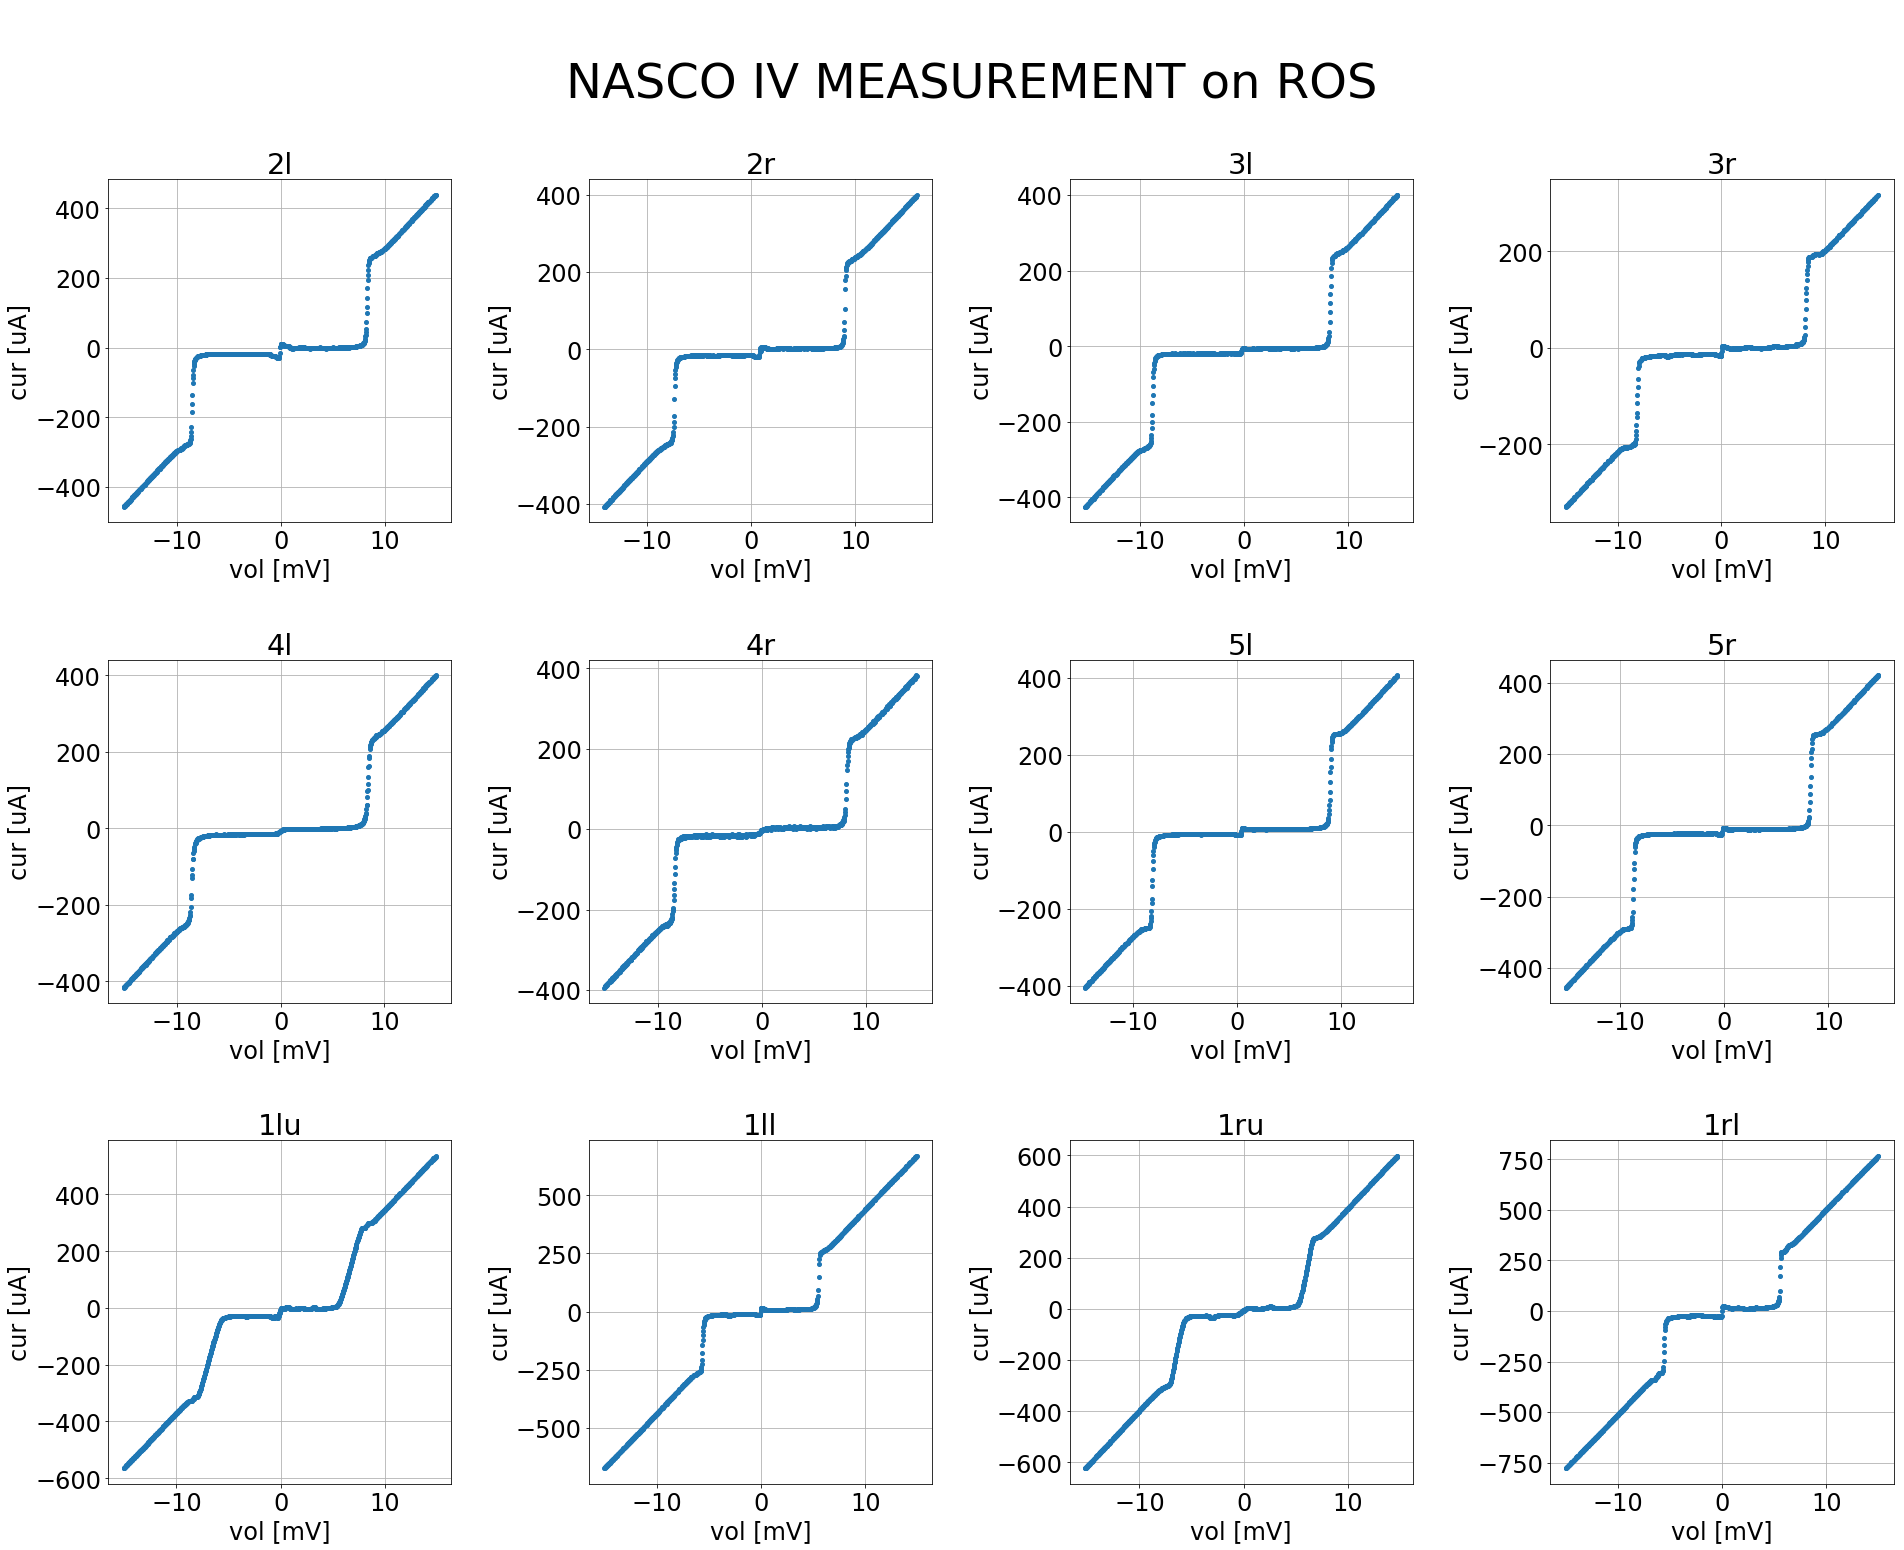

In [488]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam in zip(ax, voltage, current, beam_list):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
    _ax.set_xlabel('vol [mV]')
    _ax.set_ylabel('cur [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('\nNASCO IV MEASUREMENT on ROS', size=48)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()

In [489]:
# set_param

Rn_minus_first_current_100 = -360.
Rn_minus_last_current_100 = -300.
vgap_minus_first_current_100 = -180.
vgap_minus_last_current_100 = -80.
Rn_plus_first_current_100 = 300.
Rn_plus_last_current_100 = 360.
vgap_plus_first_current_100 = 80.
vgap_plus_last_current_100 = 180.

In [490]:
Rn_minus_first_current_200 = -500.
Rn_minus_last_current_200 = -400.
vgap_minus_first_current_200 = -200.
vgap_minus_last_current_200 = -80
Rn_plus_first_current_200 = 400.
Rn_plus_last_current_200 = 500.
vgap_plus_first_current_200 = 80.
vgap_plus_last_current_200 = 200.

In [491]:
idx_Rn_minus_first_current_100 = [
    numpy.argmin(abs(current[i] - Rn_minus_first_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_Rn_minus_last_current_100 = [
    numpy.argmin(abs(current[i] - Rn_minus_last_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_vgap_minus_first_current_100 = [
    numpy.argmin(abs(current[i] - vgap_minus_first_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_vgap_minus_last_current_100 = [
    numpy.argmin(abs(current[i] - vgap_minus_last_current_100))
    for i, beam in enumerate(beam_list[:8])
]    
idx_Rn_plus_first_current_100 = [
    numpy.argmin(abs(current[i] - Rn_plus_first_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_Rn_plus_last_current_100 = [
    numpy.argmin(abs(current[i] - Rn_plus_last_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_vgap_plus_first_current_100 = [
    numpy.argmin(abs(current[i] - vgap_plus_first_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_vgap_plus_last_current_100 = [
    numpy.argmin(abs(current[i] - vgap_plus_last_current_100))
    for i, beam in enumerate(beam_list[:8])
]

In [492]:
idx_Rn_minus_first_current_200 = [
    numpy.argmin(abs(current[i] - Rn_minus_first_current_200))
    for i in range(8, 12)
]
idx_Rn_minus_last_current_200 = [
    numpy.argmin(abs(current[i] - Rn_minus_last_current_200))
    for i in range(8, 12)
]
idx_vgap_minus_first_current_200 = [
    numpy.argmin(abs(current[i] - vgap_minus_first_current_200))
    for i in range(8, 12)
]
idx_vgap_minus_last_current_200 = [
    numpy.argmin(abs(current[i] - vgap_minus_last_current_200))
    for i in range(8, 12)
]    
idx_Rn_plus_first_current_200 = [
    numpy.argmin(abs(current[i] - Rn_plus_first_current_200))
    for i in range(8, 12)
]
idx_Rn_plus_last_current_200 = [
    numpy.argmin(abs(current[i] - Rn_plus_last_current_200))
    for i in range(8, 12)
]
idx_vgap_plus_first_current_200 = [
    numpy.argmin(abs(current[i] - vgap_plus_first_current_200))
    for i in range(8, 12)
]
idx_vgap_plus_last_current_200 = [
    numpy.argmin(abs(current[i] - vgap_plus_last_current_200))
    for i in range(8, 12)
]

In [493]:
idx_Rn_minus_first_current = idx_Rn_minus_first_current_100 + idx_Rn_minus_first_current_200
idx_Rn_minus_last_current = idx_Rn_minus_last_current_100 + idx_Rn_minus_last_current_200
idx_vgap_minus_first_current = idx_vgap_minus_first_current_100 + idx_vgap_minus_first_current_200
idx_vgap_minus_last_current = idx_vgap_minus_last_current_100 + idx_vgap_minus_last_current_200
idx_Rn_plus_first_current = idx_Rn_plus_first_current_100 + idx_Rn_plus_first_current_200
idx_Rn_plus_last_current = idx_Rn_plus_last_current_100 + idx_Rn_plus_last_current_200
idx_vgap_plus_first_current = idx_vgap_plus_first_current_100 + idx_vgap_plus_first_current_200
idx_vgap_plus_last_current = idx_vgap_plus_last_current_100 + idx_vgap_plus_last_current_200

In [494]:
Rn_minus_voltage = [
    voltage[i][idx_Rn_minus_first_current[i]:idx_Rn_minus_last_current[i] + 1]
    for i in range(len(beam_list))
]
vgap_minus_voltage = [
    voltage[i][idx_vgap_minus_first_current[i]:idx_vgap_minus_last_current[i] + 1]
    for i in range(len(beam_list))
]
Rn_plus_voltage = [
    voltage[i][idx_Rn_plus_first_current[i]:idx_Rn_plus_last_current[i] + 1]
    for i in range(len(beam_list))
]
vgap_plus_voltage = [
    voltage[i][idx_vgap_plus_first_current[i]:idx_vgap_plus_last_current[i] + 1]
    for i in range(len(beam_list))
]

In [495]:
Rn_minus_current = [
    current[i][idx_Rn_minus_first_current[i]:idx_Rn_minus_last_current[i] + 1]
    for i in range(len(beam_list))
]
vgap_minus_current = [
    current[i][idx_vgap_minus_first_current[i]:idx_vgap_minus_last_current[i] + 1]
    for i in range(len(beam_list))
]
Rn_plus_current = [
    current[i][idx_Rn_plus_first_current[i]:idx_Rn_plus_last_current[i] + 1]
    for i in range(len(beam_list))
]
vgap_plus_current = [
    current[i][idx_vgap_plus_first_current[i]:idx_vgap_plus_last_current[i] + 1]
    for i in range(len(beam_list))
]

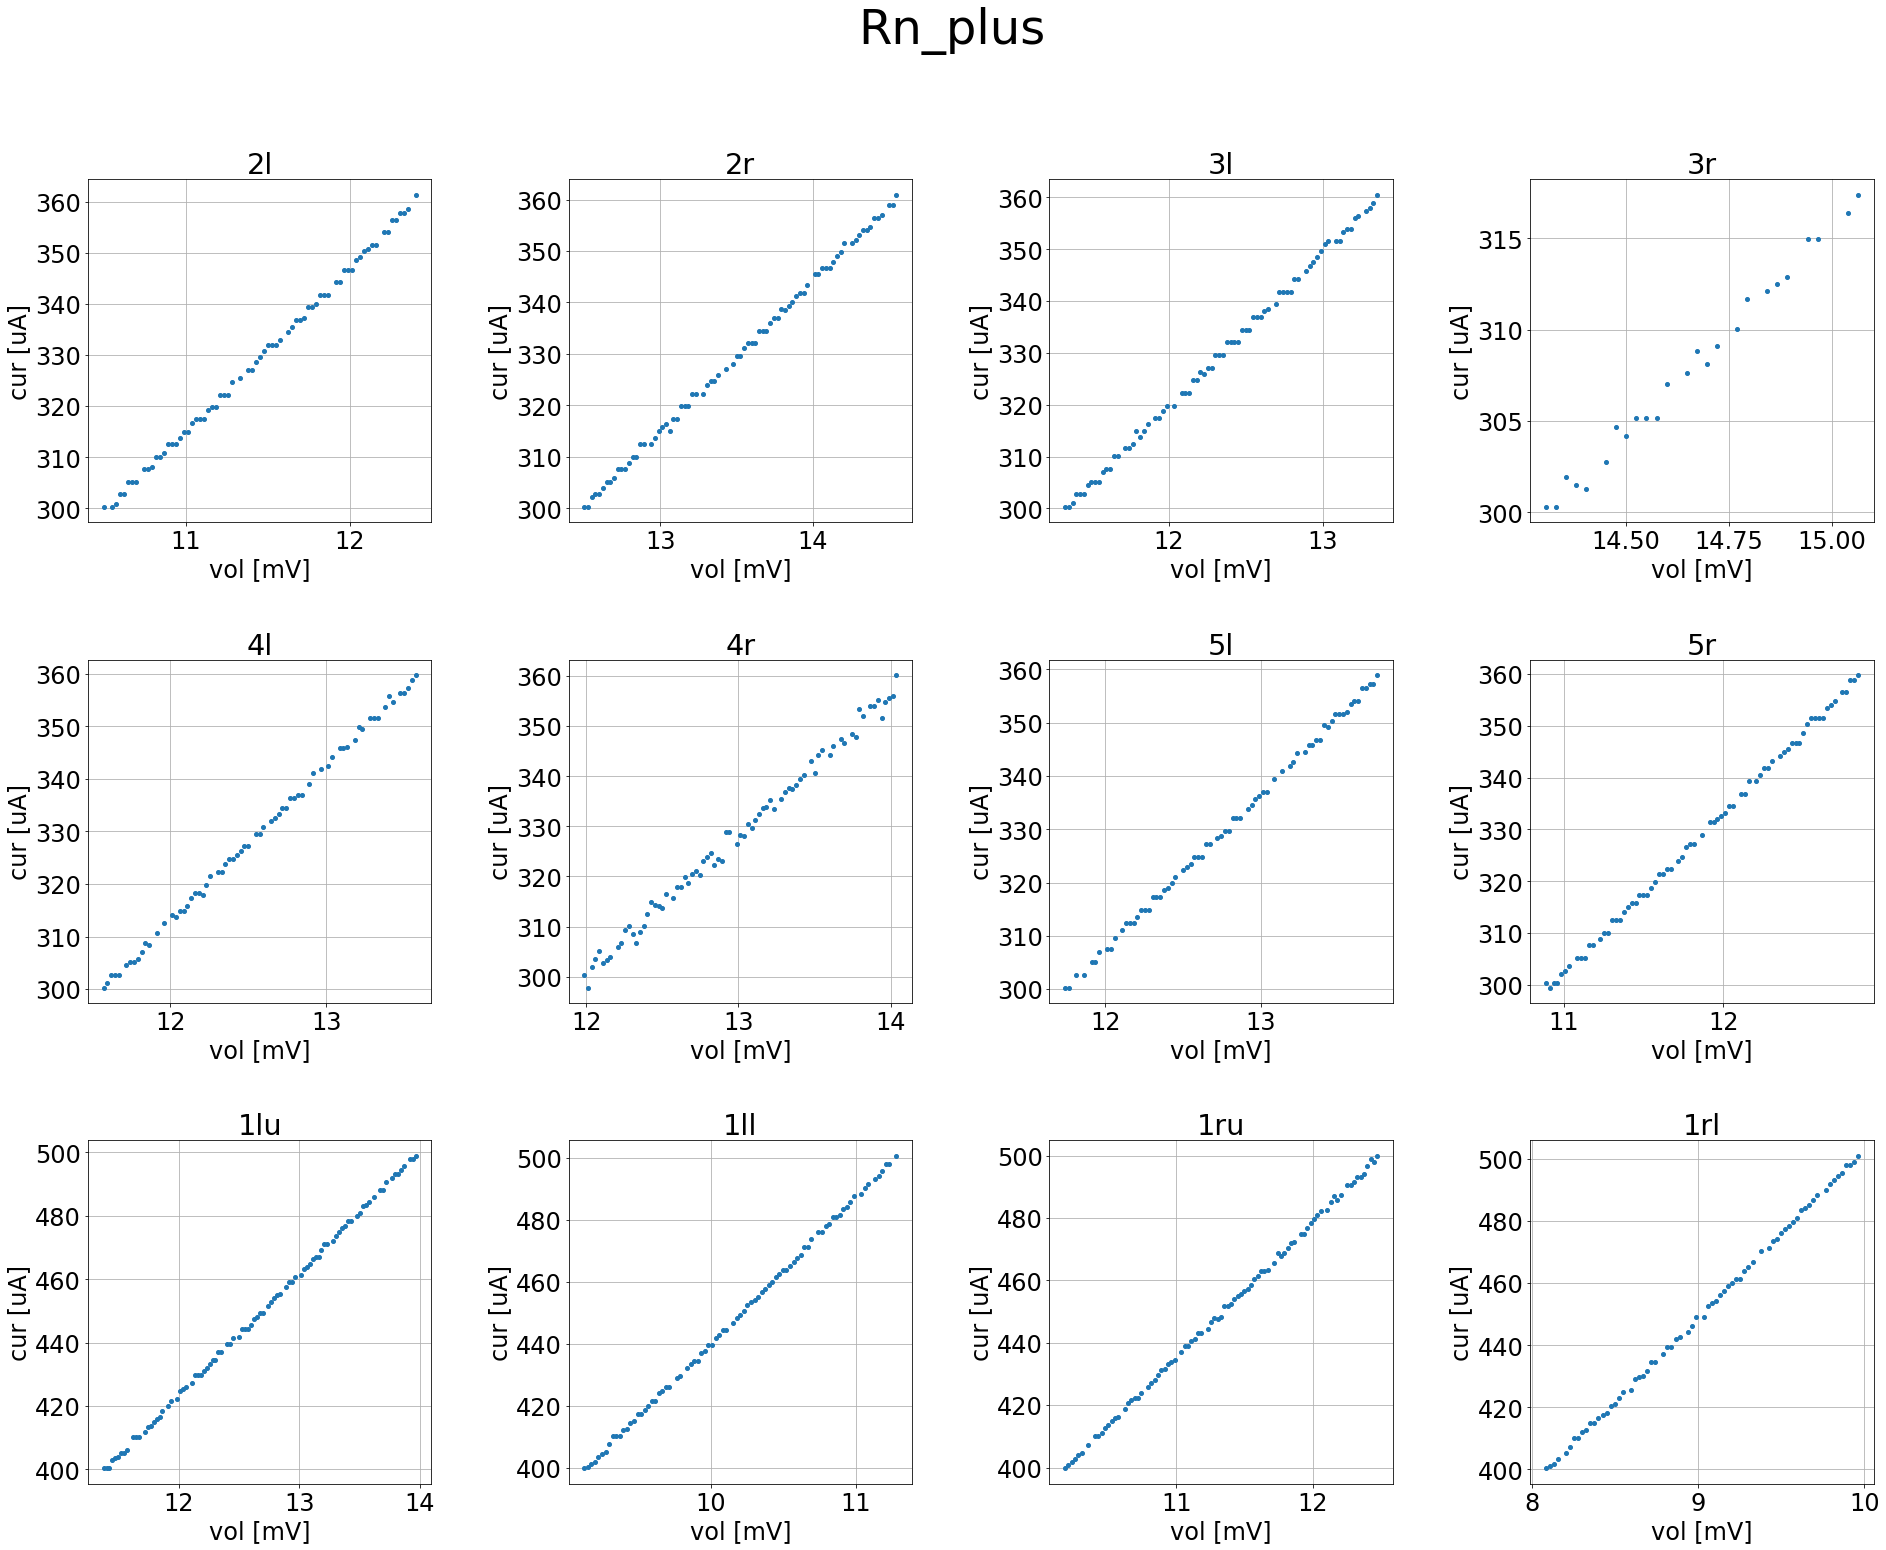

In [496]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam in zip(ax, Rn_plus_voltage, Rn_plus_current, beam_list):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
    _ax.set_xlabel('vol [mV]')
    _ax.set_ylabel('cur [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('Rn_plus', size=48)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()

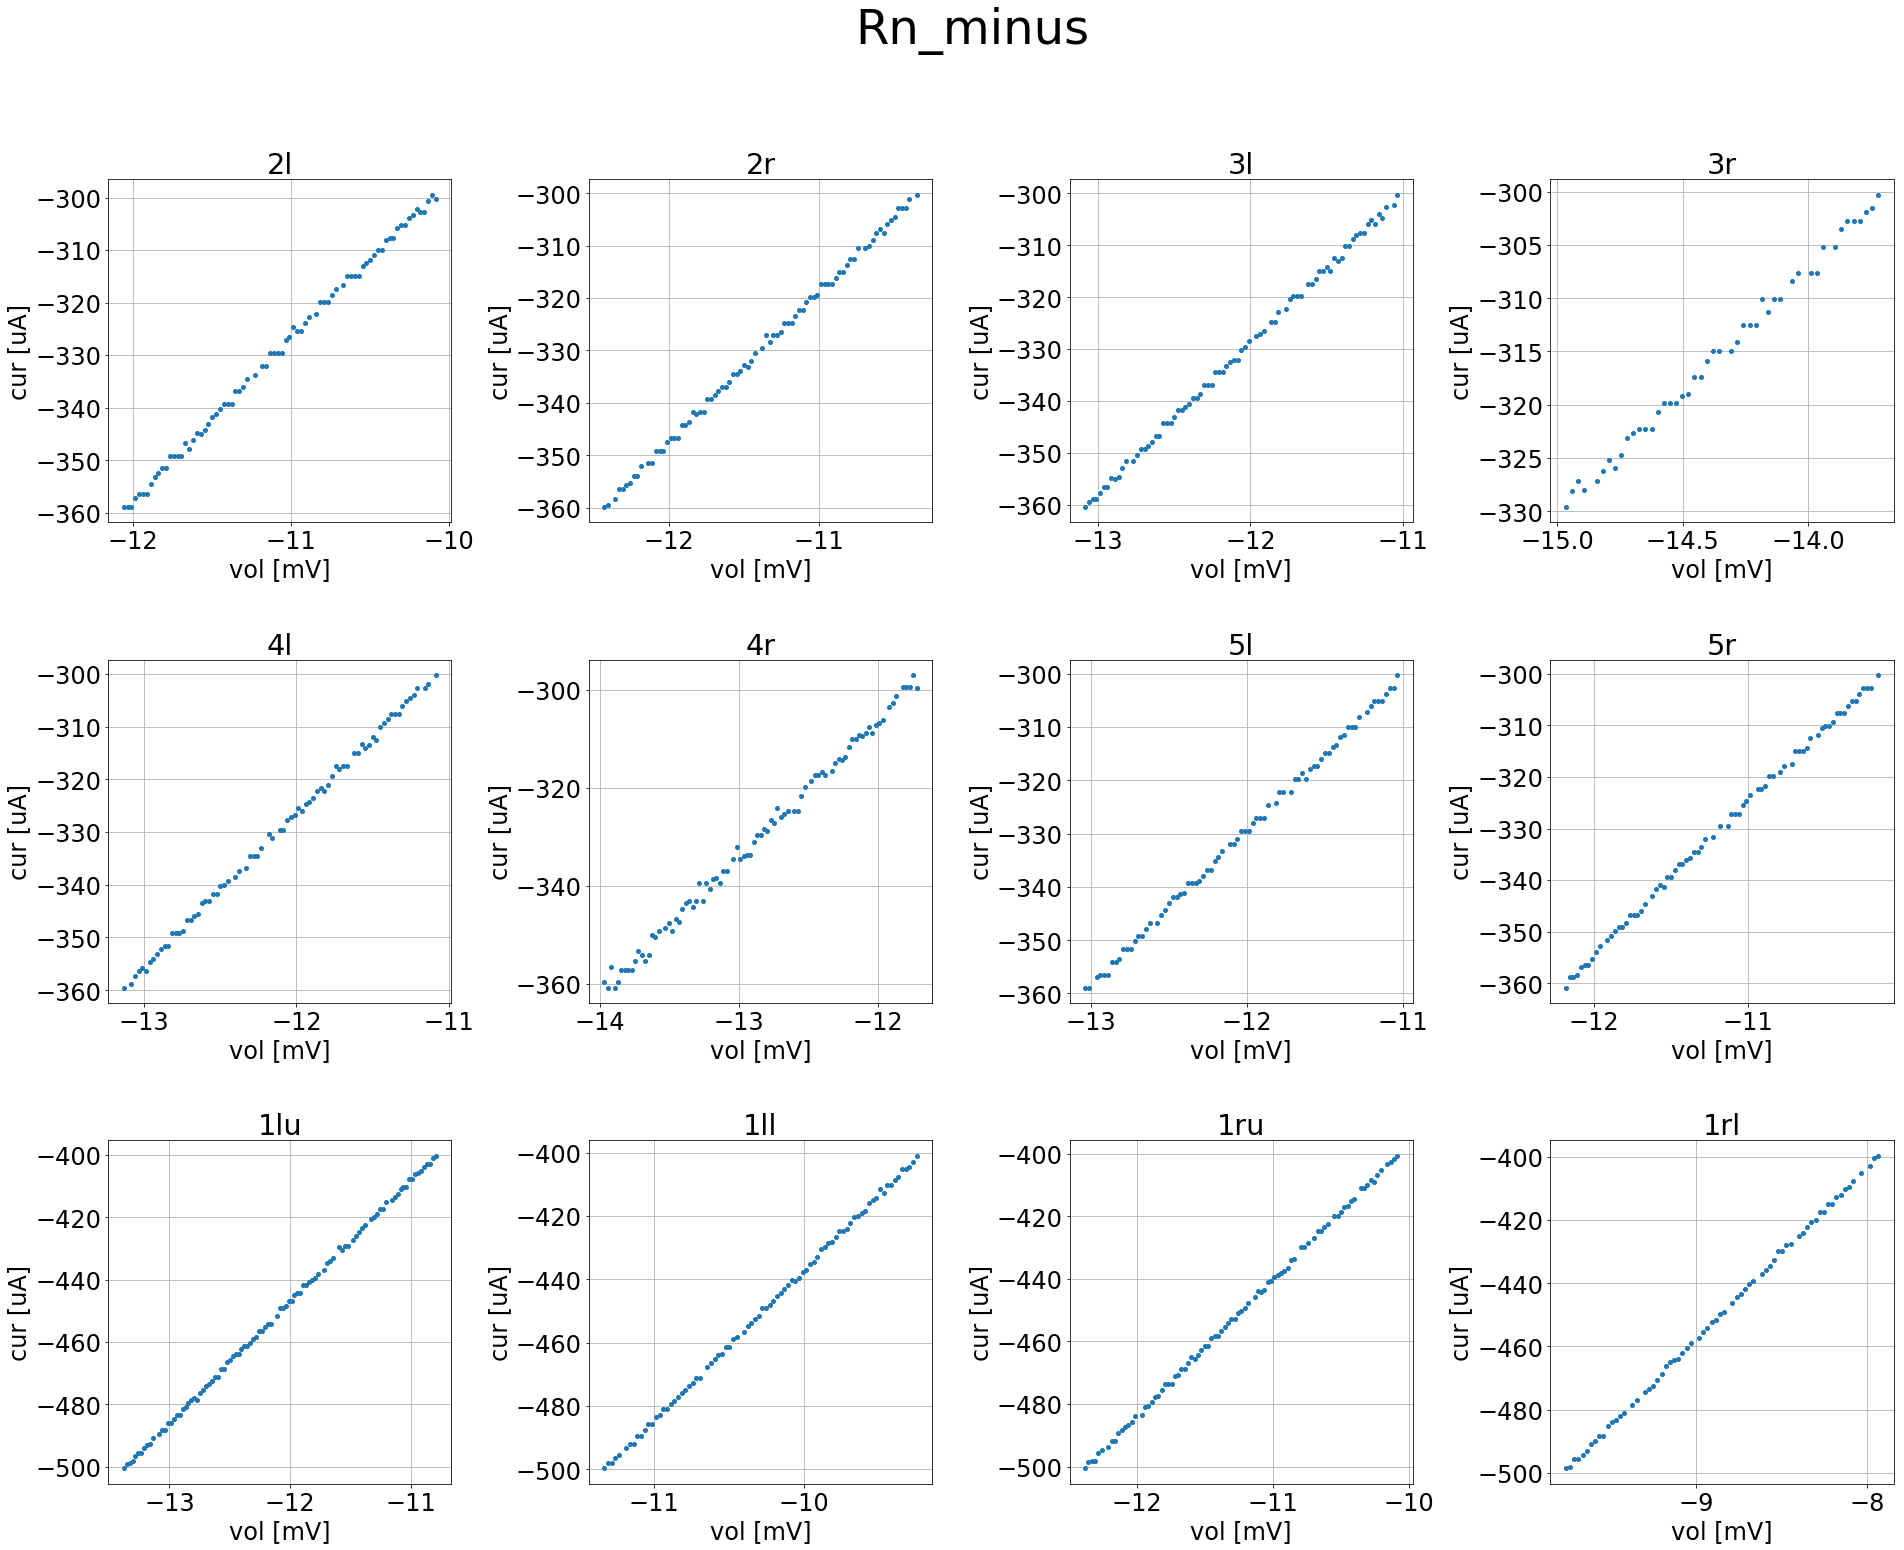

In [497]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam in zip(ax, Rn_minus_voltage, Rn_minus_current, beam_list):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
    _ax.set_xlabel('vol [mV]')
    _ax.set_ylabel('cur [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('Rn_minus', size=48)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()

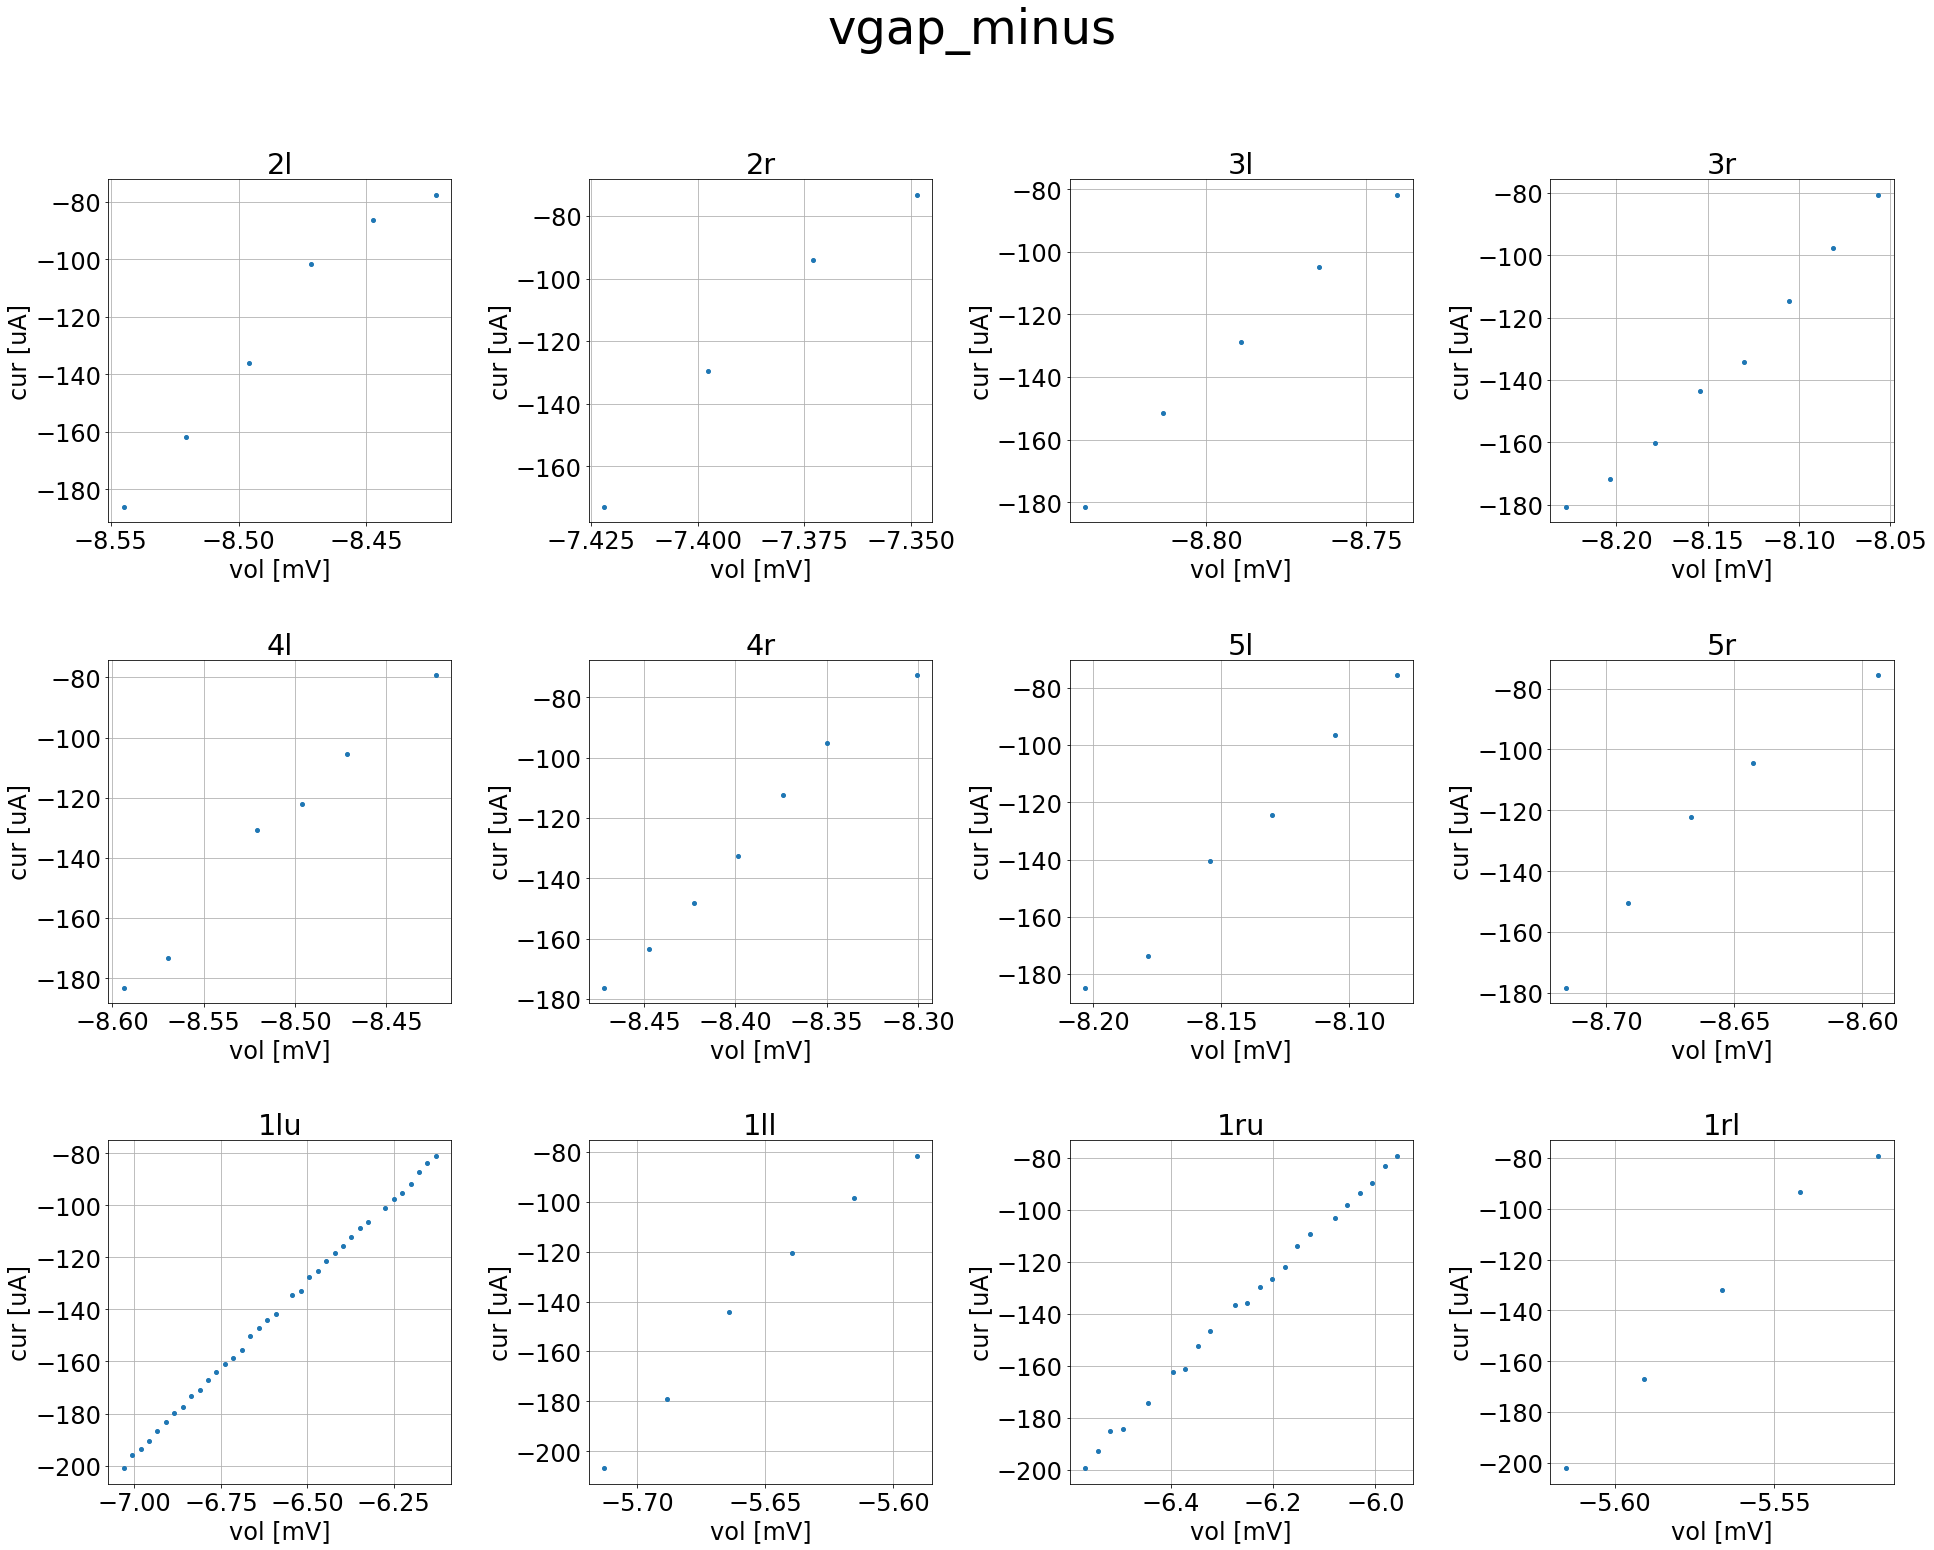

In [498]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam in zip(ax, vgap_minus_voltage, vgap_minus_current, beam_list):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
    _ax.set_xlabel('vol [mV]')
    _ax.set_ylabel('cur [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('vgap_minus', size=48)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()

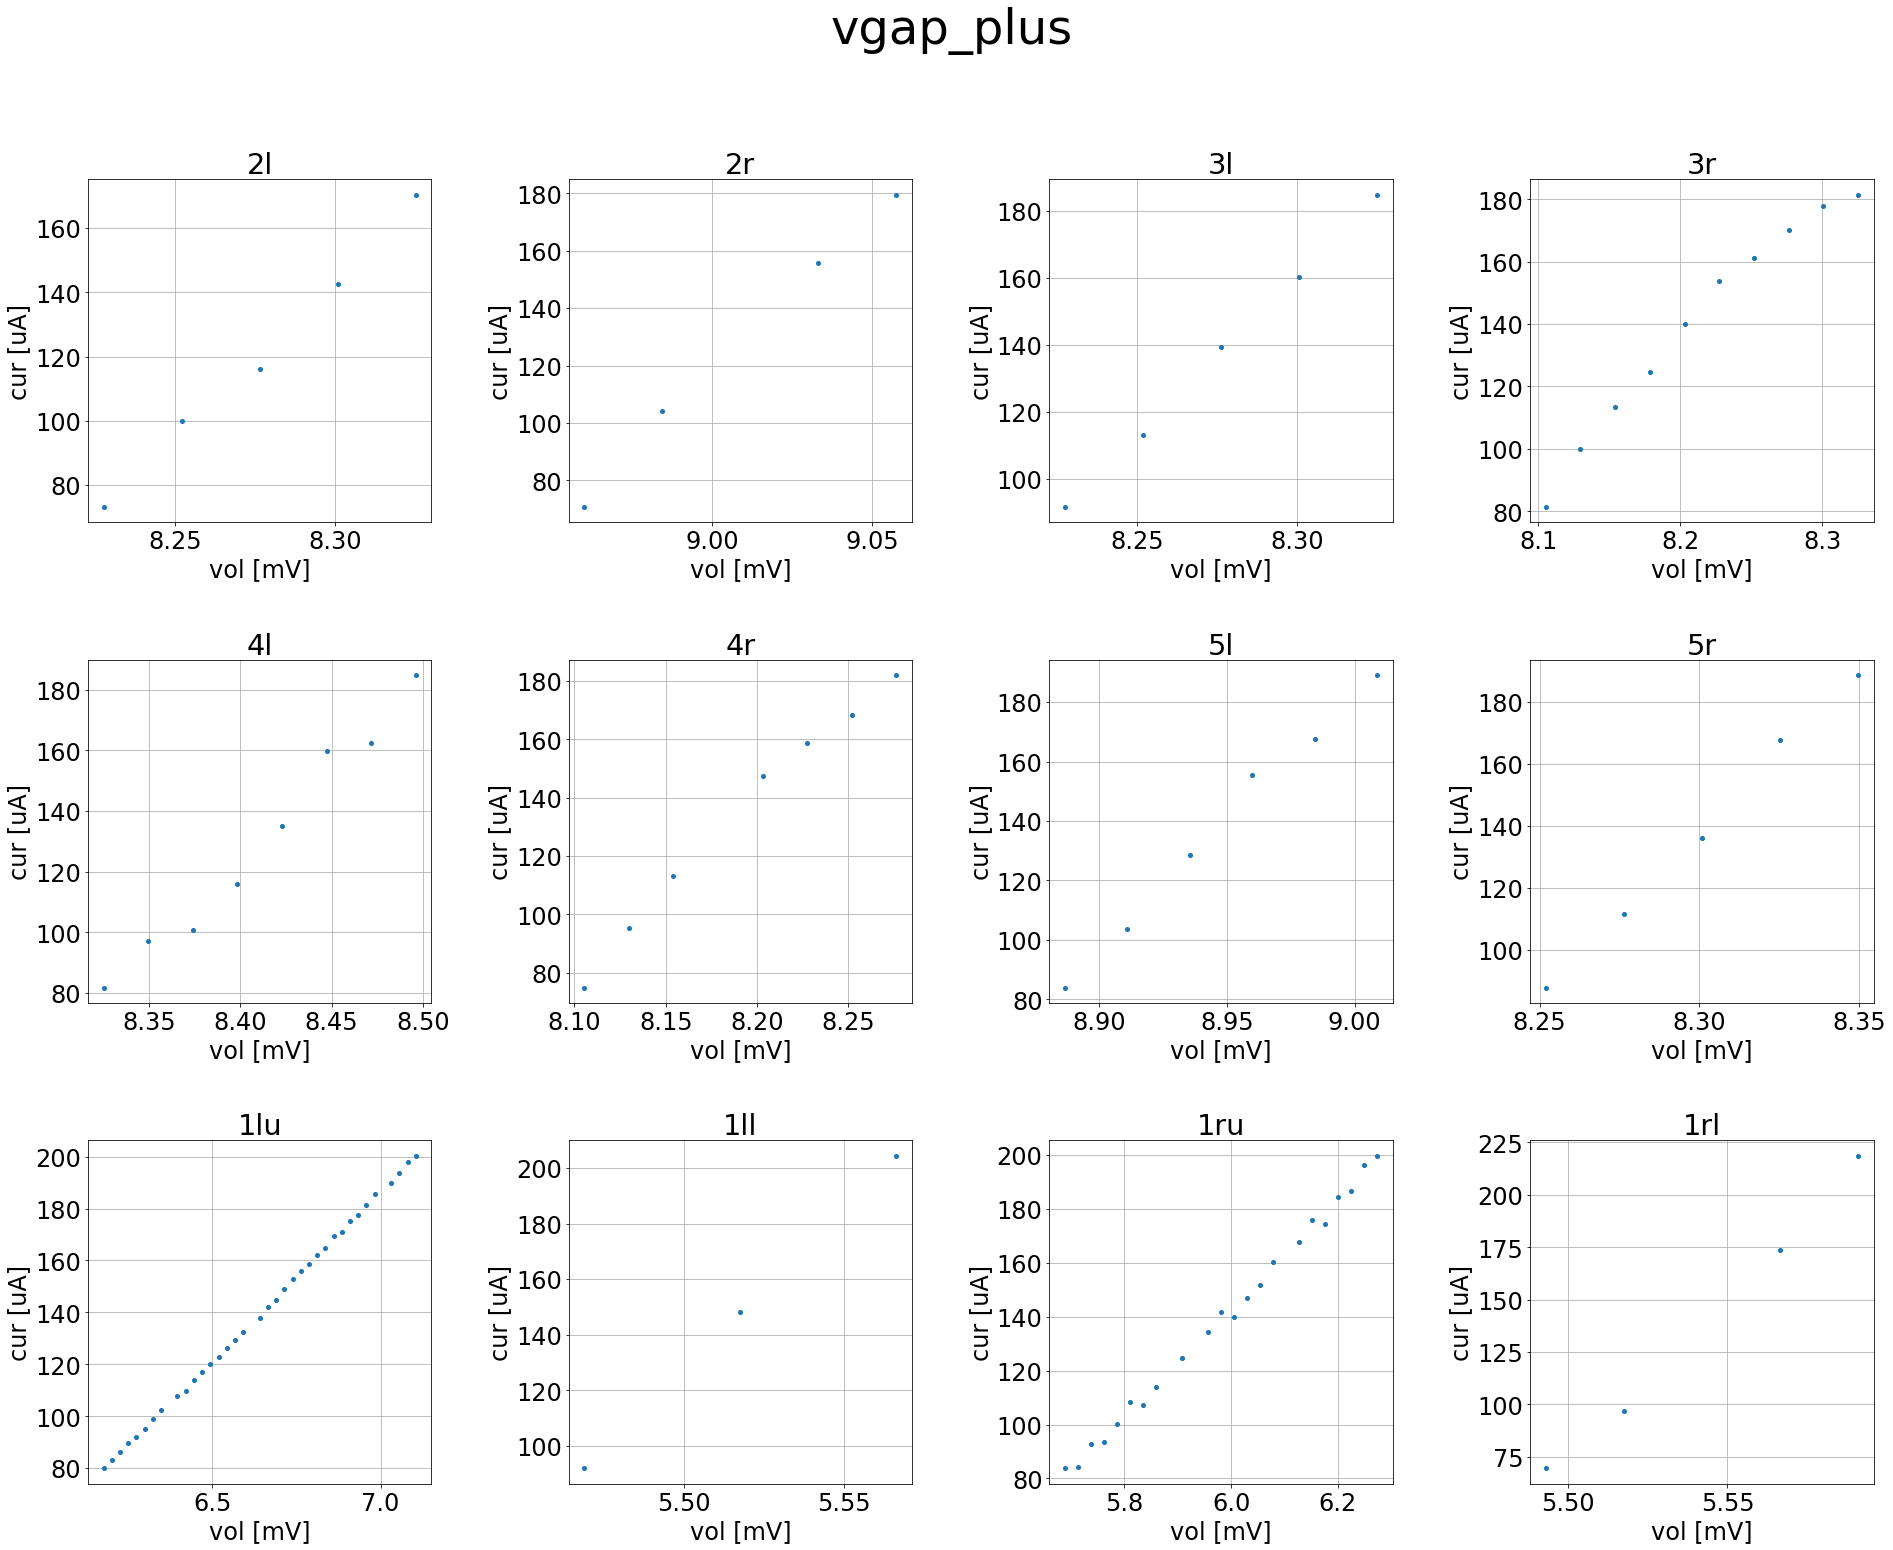

In [499]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam in zip(ax, vgap_plus_voltage, vgap_plus_current, beam_list):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
    _ax.set_xlabel('vol [mV]')
    _ax.set_ylabel('cur [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('vgap_plus', size=48)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()

In [500]:
def func(x, a, b):
    return a * x + b

In [501]:
Rn_minus_a = numpy.array([
    numpy.polyfit(Rn_minus_voltage[i], Rn_minus_current[i], 1)[0]
    for i in range(len(beam_list))
])
Rn_minus_b = numpy.array([
    numpy.polyfit(Rn_minus_voltage[i], Rn_minus_current[i], 1)[1] 
    for i in range(len(beam_list))
])
vgap_minus_a = numpy.array([
    numpy.polyfit(vgap_minus_voltage[i], vgap_minus_current[i], 1)[0]
    for i in range(len(beam_list))
])
vgap_minus_b = numpy.array([
    numpy.polyfit(vgap_minus_voltage[i], vgap_minus_current[i], 1)[1]
    for i in range(len(beam_list))
])
Rn_plus_a = numpy.array([
    numpy.polyfit(Rn_plus_voltage[i], Rn_plus_current[i], 1)[0]
    for i in range(len(beam_list))
])
Rn_plus_b = numpy.array([
    numpy.polyfit(Rn_plus_voltage[i], Rn_plus_current[i], 1)[1]
    for i in range(len(beam_list))
])
vgap_plus_a = numpy.array([
    numpy.polyfit(vgap_plus_voltage[i], vgap_plus_current[i], 1)[0] 
    for i in range(len(beam_list))
])
vgap_plus_b = numpy.array([
    numpy.polyfit(vgap_plus_voltage[i], vgap_plus_current[i], 1)[1]
    for i in range(len(beam_list))
])

In [502]:
p_minus_x = (vgap_minus_b - Rn_minus_b) / (Rn_minus_a - vgap_minus_a)
p_minus_y = (Rn_minus_a * vgap_minus_b - Rn_minus_b * vgap_minus_a) / (Rn_minus_a - vgap_minus_a)
p_minus = numpy.array([p_minus_x, p_minus_y])

p_plus_x = (vgap_plus_b - Rn_plus_b) / (Rn_plus_a - vgap_plus_a)
p_plus_y = (Rn_plus_a * vgap_plus_b - Rn_plus_b * vgap_plus_a) / (Rn_plus_a - vgap_plus_a)
p_plus = numpy.array([p_plus_x, p_plus_y])

In [503]:
p = (p_minus + p_plus) / 2

In [504]:
p

array([[ -0.11488655,   0.80848442,  -0.27200333,   0.0282179 ,
         -0.06166427,  -0.11389896,   0.40312792,  -0.22241925,
         -0.06762923,  -0.07657485,  -0.20961042,  -0.02525134],
       [-11.15329782,  -8.35479098, -13.64103436,  -5.69370095,
         -9.46991664,  -5.89773939,   0.21594988, -20.18406689,
        -13.71997197,  -0.98000718, -11.0796885 ,  -5.05105371]])

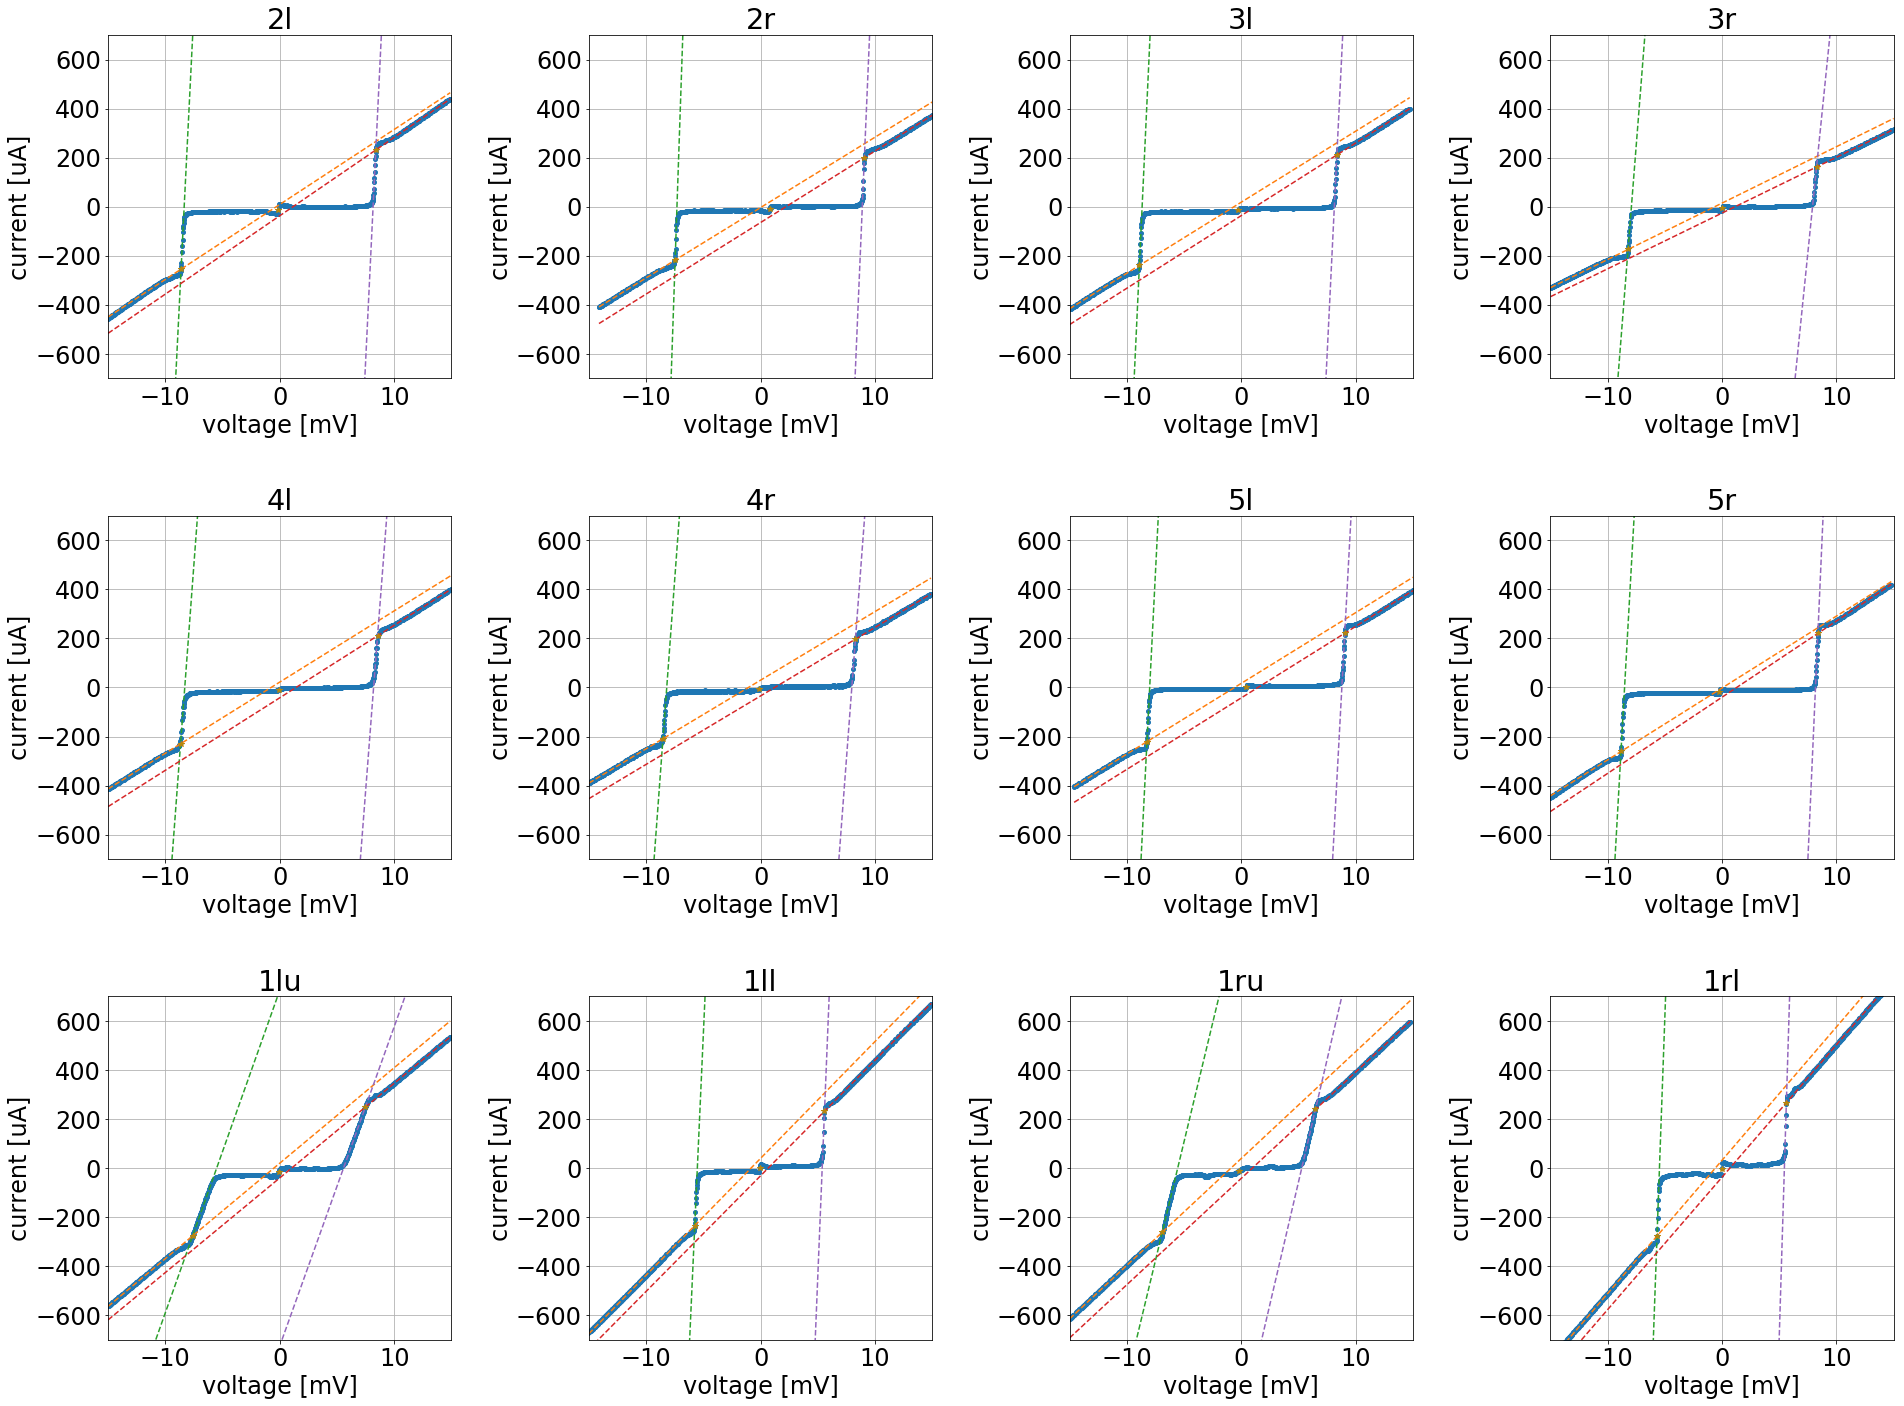

In [505]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

x = [
    numpy.linspace(min(voltage[i]), max(voltage[i]), 10000)
    for i in range(len(beam_list))
]

for _ax, _vol, _cur, beam, _x, i in zip(ax, voltage, current, beam_list, x, range(12)):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.plot(_x, func(_x, Rn_minus_a[i], Rn_minus_b[i]), '--')
    _ax.plot(_x, func(_x, vgap_minus_a[i], vgap_minus_b[i]), '--')
    _ax.plot(_x, func(_x, Rn_plus_a[i], Rn_plus_b[i]), '--')
    _ax.plot(_x, func(_x, vgap_plus_a[i], vgap_plus_b[i]), '--')    
    _ax.grid()
    _ax.set_xlim(-15, 15)
    _ax.set_ylim(-700, 700)    
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_title('{}'.format(beam))
    _ax.plot(p_minus_x[i], p_minus_y[i], c='darkgoldenrod', marker='*')
    _ax.plot(p_plus_x[i], p_plus_y[i], c='darkgoldenrod', marker='*')
    _ax.plot(p[0][i], p[1][i], c='darkgoldenrod', marker='*')

fig.subplots_adjust(wspace=0.4, hspace=0.4)

matplotlib.pyplot.show()

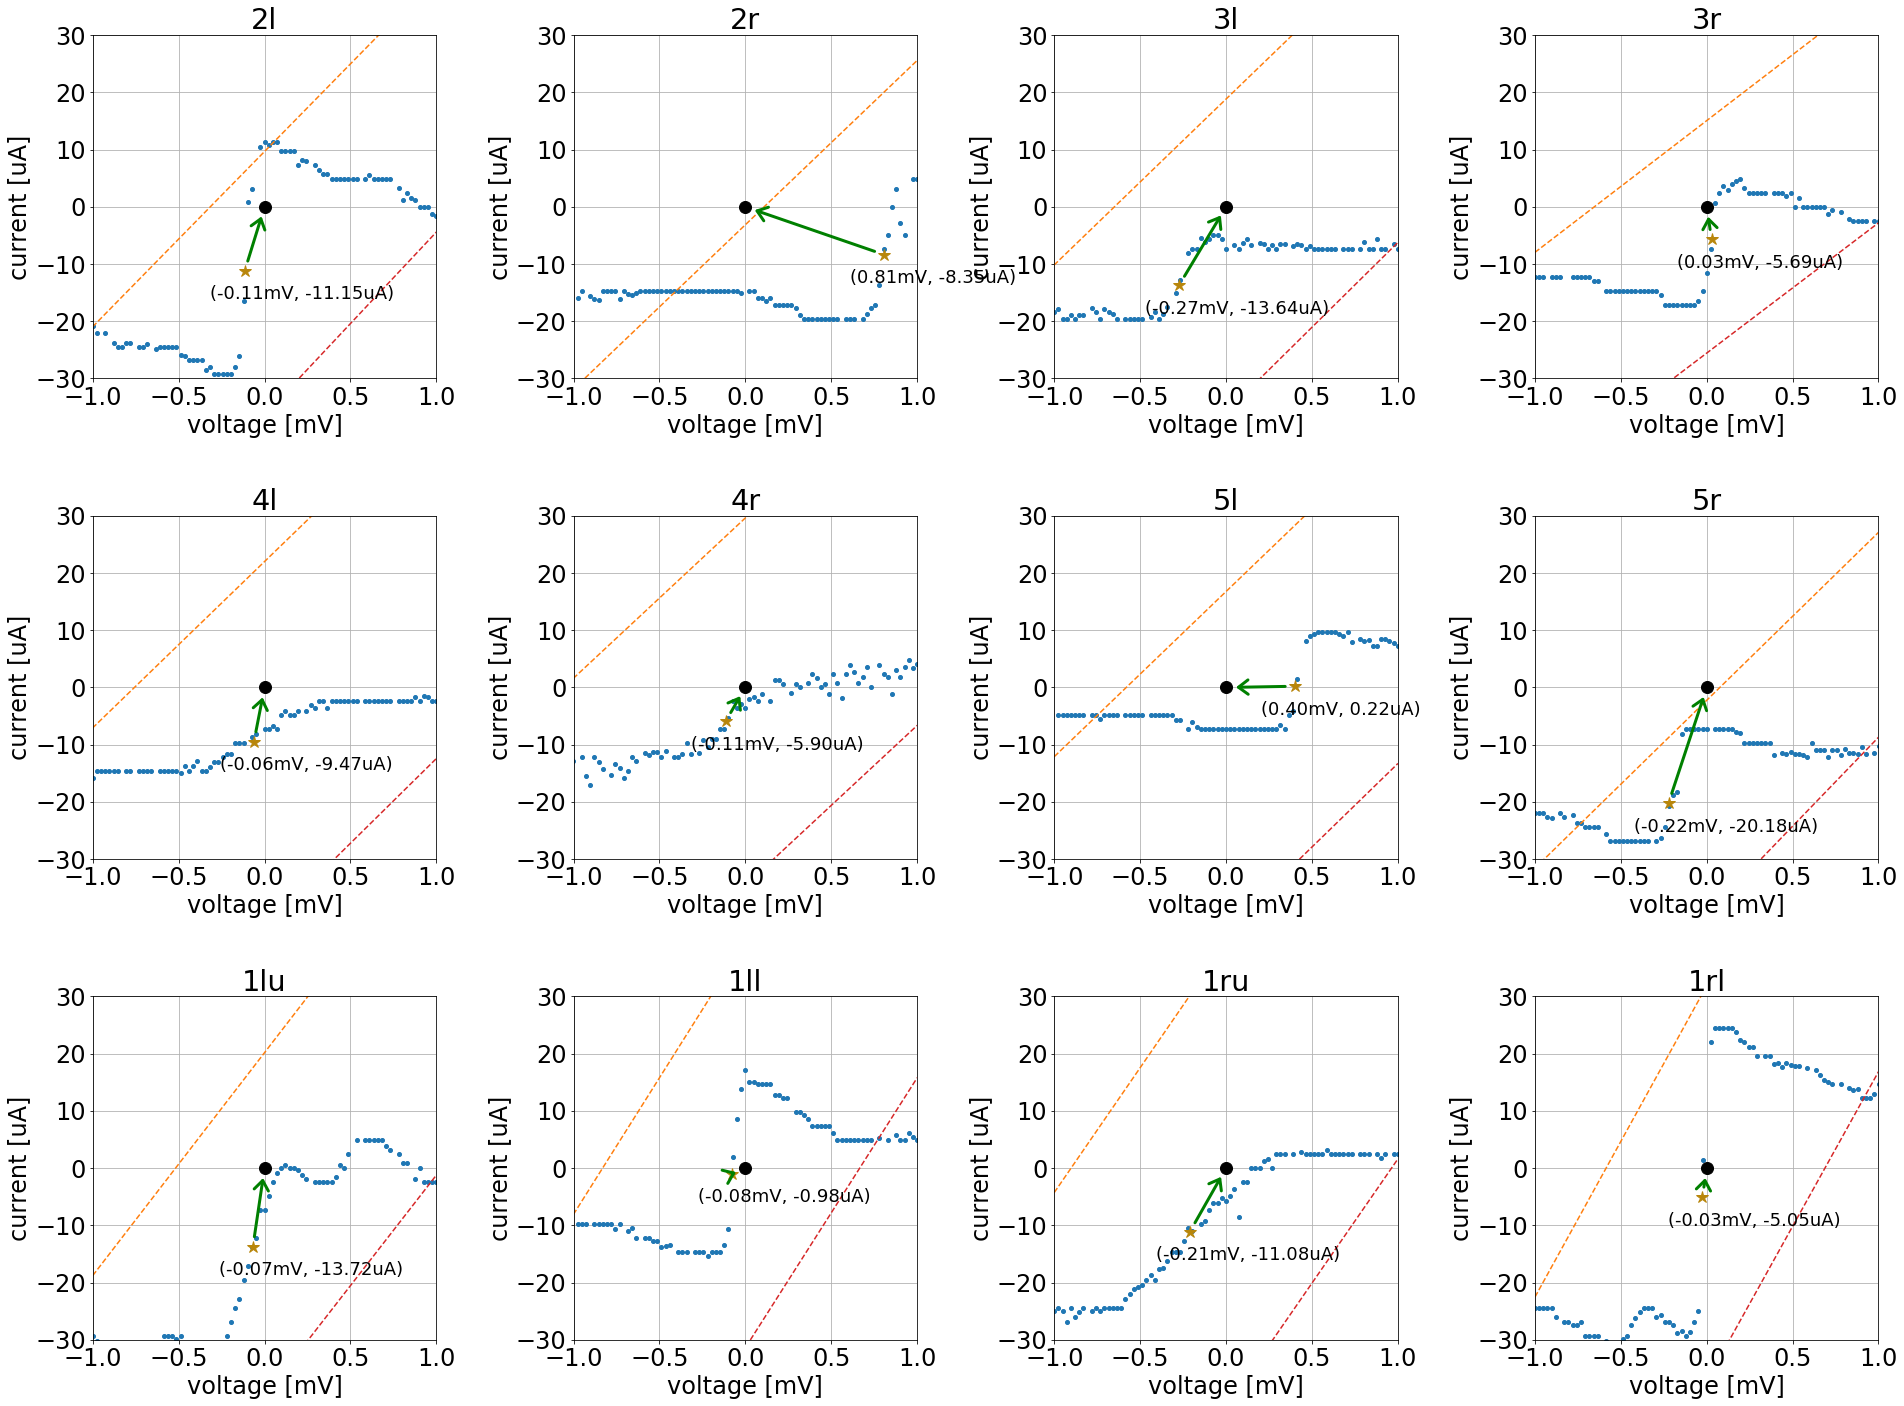

In [506]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

x = [
    numpy.linspace(min(voltage[i]), max(voltage[i]), 10000)
    for i in range(len(beam_list))
]

for _ax, _vol, _cur, beam, _x, i in zip(ax, voltage, current, beam_list, x, range(12)):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.plot(_x, func(_x, Rn_minus_a[i], Rn_minus_b[i]), '--')
    _ax.plot(_x, func(_x, vgap_minus_a[i], vgap_minus_b[i]), '--')
    _ax.plot(_x, func(_x, Rn_plus_a[i], Rn_plus_b[i]), '--')
    _ax.plot(_x, func(_x, vgap_plus_a[i], vgap_plus_b[i]), '--')    
    _ax.grid()
    _ax.set_xlim(-1, 1)
    _ax.set_ylim(-30, 30)    
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_title('{}'.format(beam))
    _ax.plot(0., 0., c='black', marker='o', markersize=12)    
    _ax.plot(p[0][i], p[1][i], c='darkgoldenrod', marker='*', markersize=12)
    _ax.annotate(s='', xy=(p[0][i], p[1][i]),xytext=(0., 0.),xycoords='data',\
                 arrowprops=dict(facecolor='green', edgecolor='green', arrowstyle='<-, head_width=0.3',lw=3,shrinkA=10,shrinkB=10))
    _ax.text(p[0][i]-0.2, p[1][i]-5., '({0:.2f}mV, {1:.2f}uA)'.format(p[0][i], p[1][i]), size=18)

fig.subplots_adjust(wspace=0.4, hspace=0.4)

matplotlib.pyplot.show()

In [507]:
# モニター側のオフセットを補正
voltage1 = [voltage[i] - p[0][i] for i in range(len(beam_list))]
current1 = [current[i] - p[1][i] for i in range(len(beam_list))]

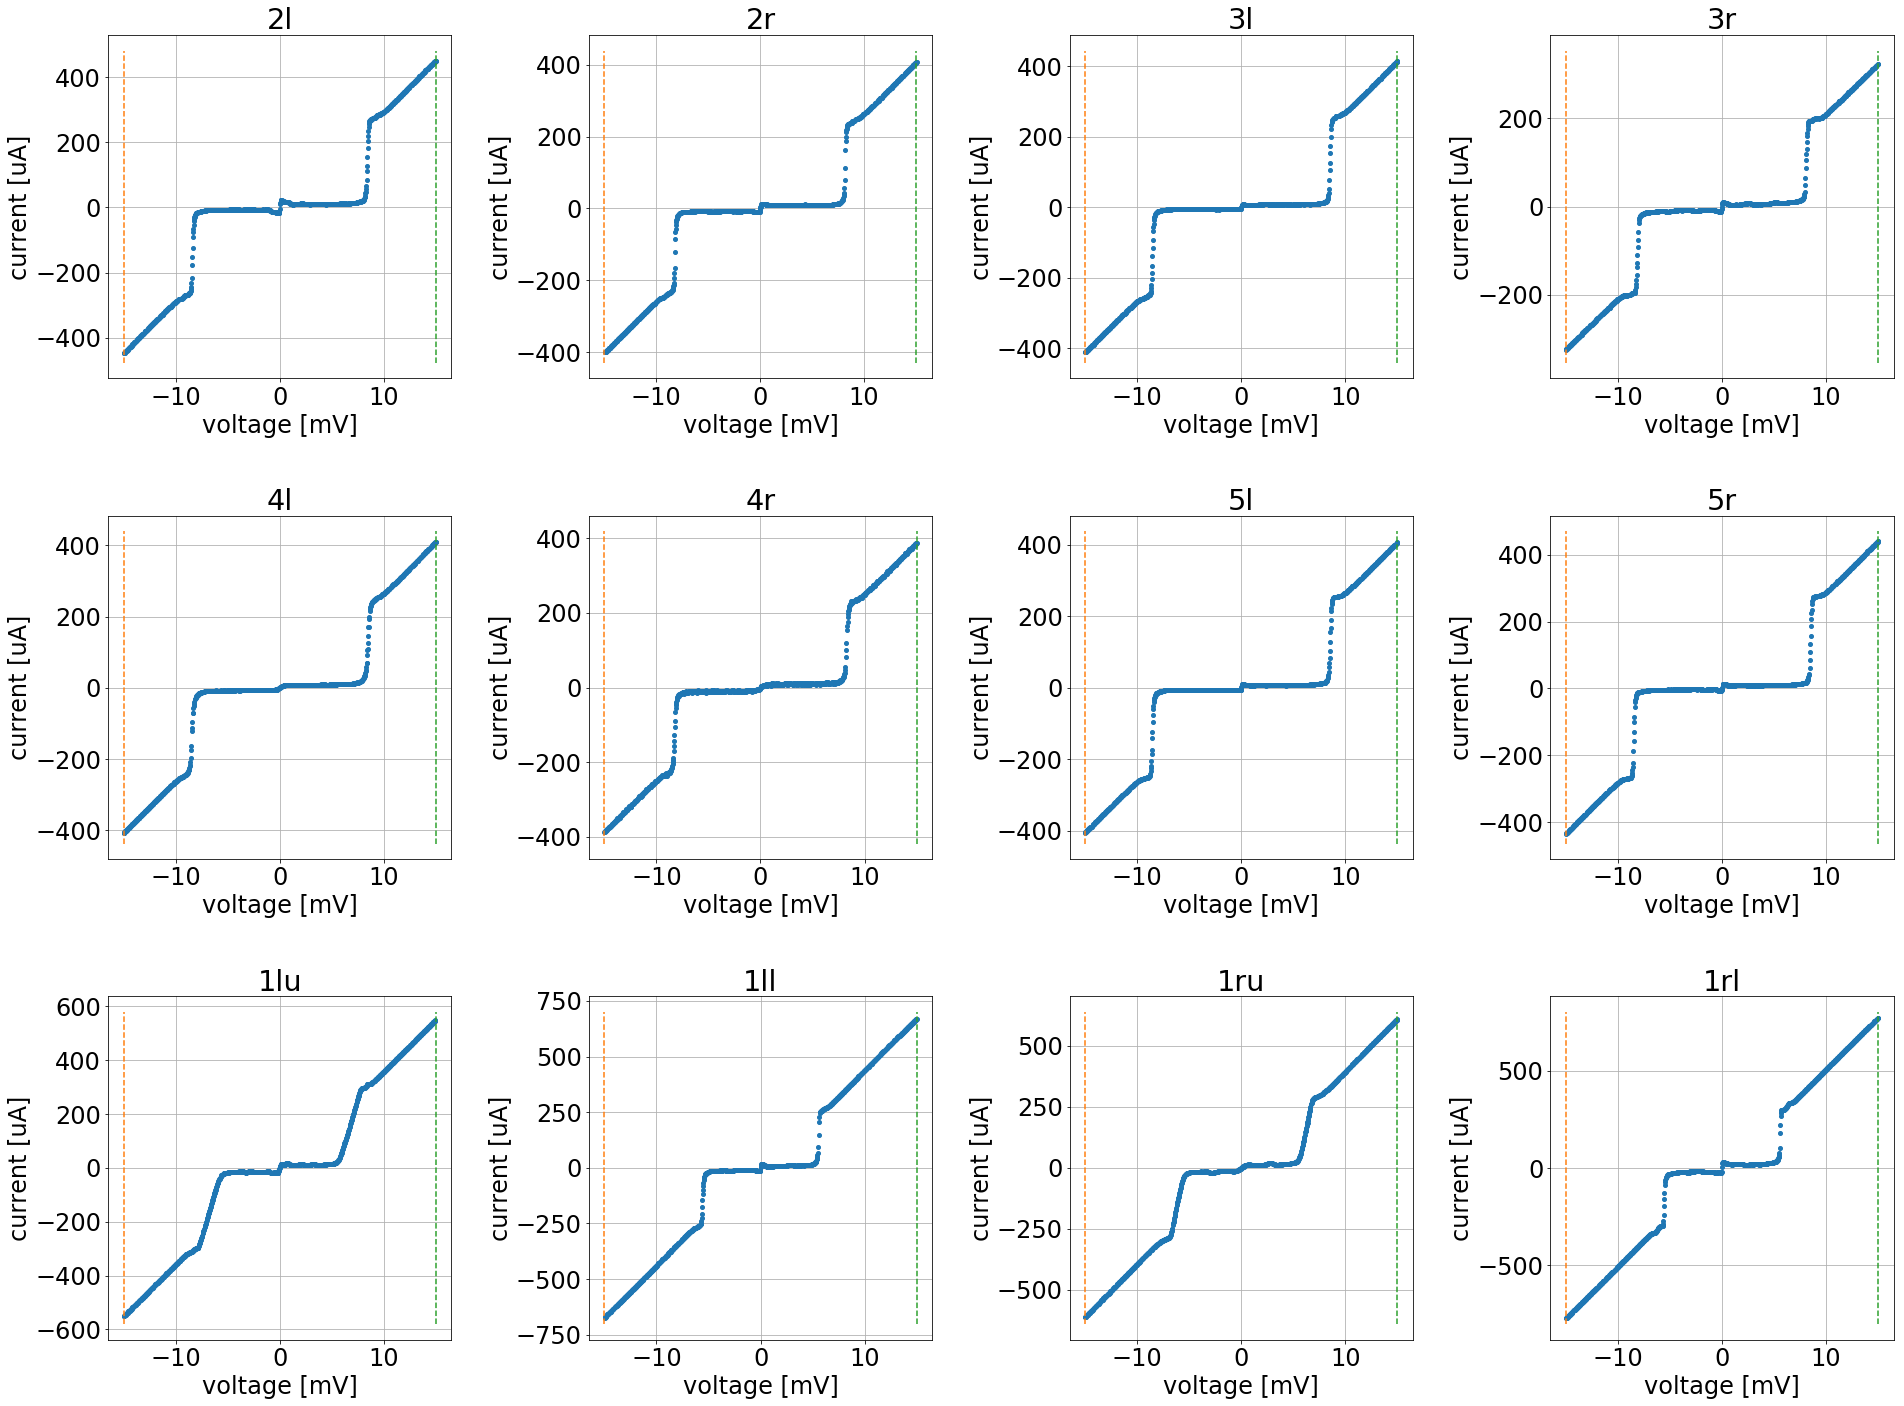

In [508]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam, _x, i in zip(ax, voltage1, current1, beam_list, x, range(12)):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
#     _ax.set_xlim(-15, 15)
#     _ax.set_ylim(-500, 500)    
    _ax.plot([-15., -15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.plot([15., 15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)

matplotlib.pyplot.show()

In [509]:
# 補正
bias_offset_plus = numpy.array([voltage1[i][-1] for i in range(len(beam_list))])
bias_offset_minus = numpy.array([voltage1[i][0] for i in range(len(beam_list))])
bias_offset = (bias_offset_plus + bias_offset_minus) / 2
print(bias_offset)

[ 0.0172303   0.08262886 -0.00875839  0.02061022 -0.01157792  0.00403568
 -0.00029588  0.01489972 -0.01781998  0.00333266 -0.01011614  0.00083727]


In [510]:
voltage[0]

array([-15.08789062, -15.06347656, -15.0390625 , ...,  14.84375   ,
        14.86816406,  14.89257812])

In [511]:
voltage2 = [voltage1[i] - bias_offset[i] for i in range(len(beam_list))]
current2 = current1

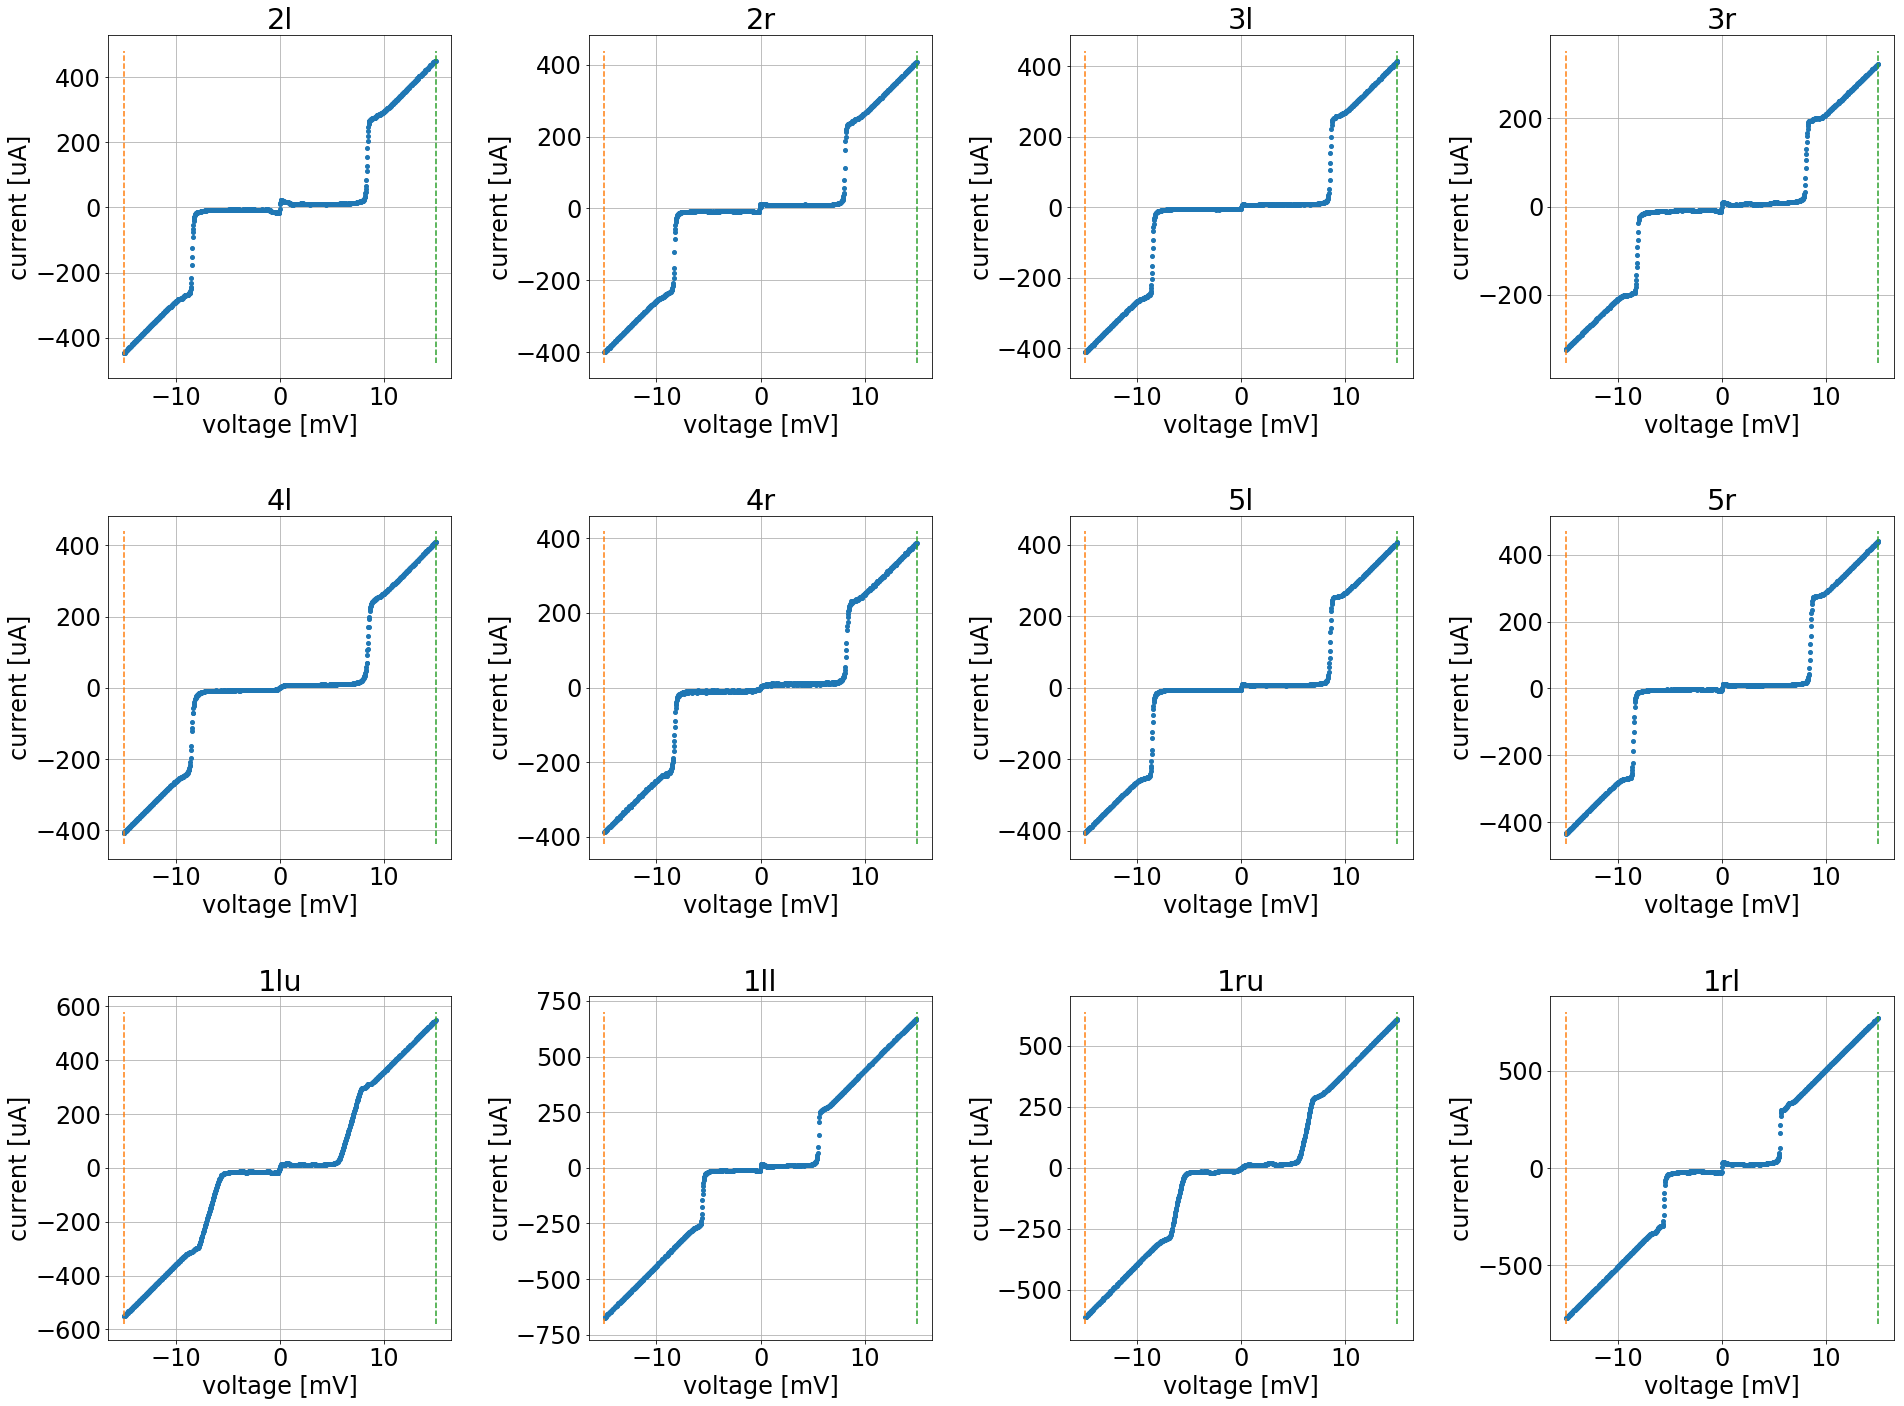

In [512]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam, _x, i in zip(ax, voltage2, current2, beam_list, x, range(12)):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
#     _ax.set_xlim(-15, 15)
#     _ax.set_ylim(-500, 500)    
    _ax.plot([-15., -15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.plot([15., 15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)

matplotlib.pyplot.show()

In [513]:
bias_scale_factor = [voltage2[i][-1] / 15 for i in range(len(beam_list))]
voltage3 = [voltage2[i] / bias_scale_factor[i] for i in range(len(beam_list))]
current3 = current2

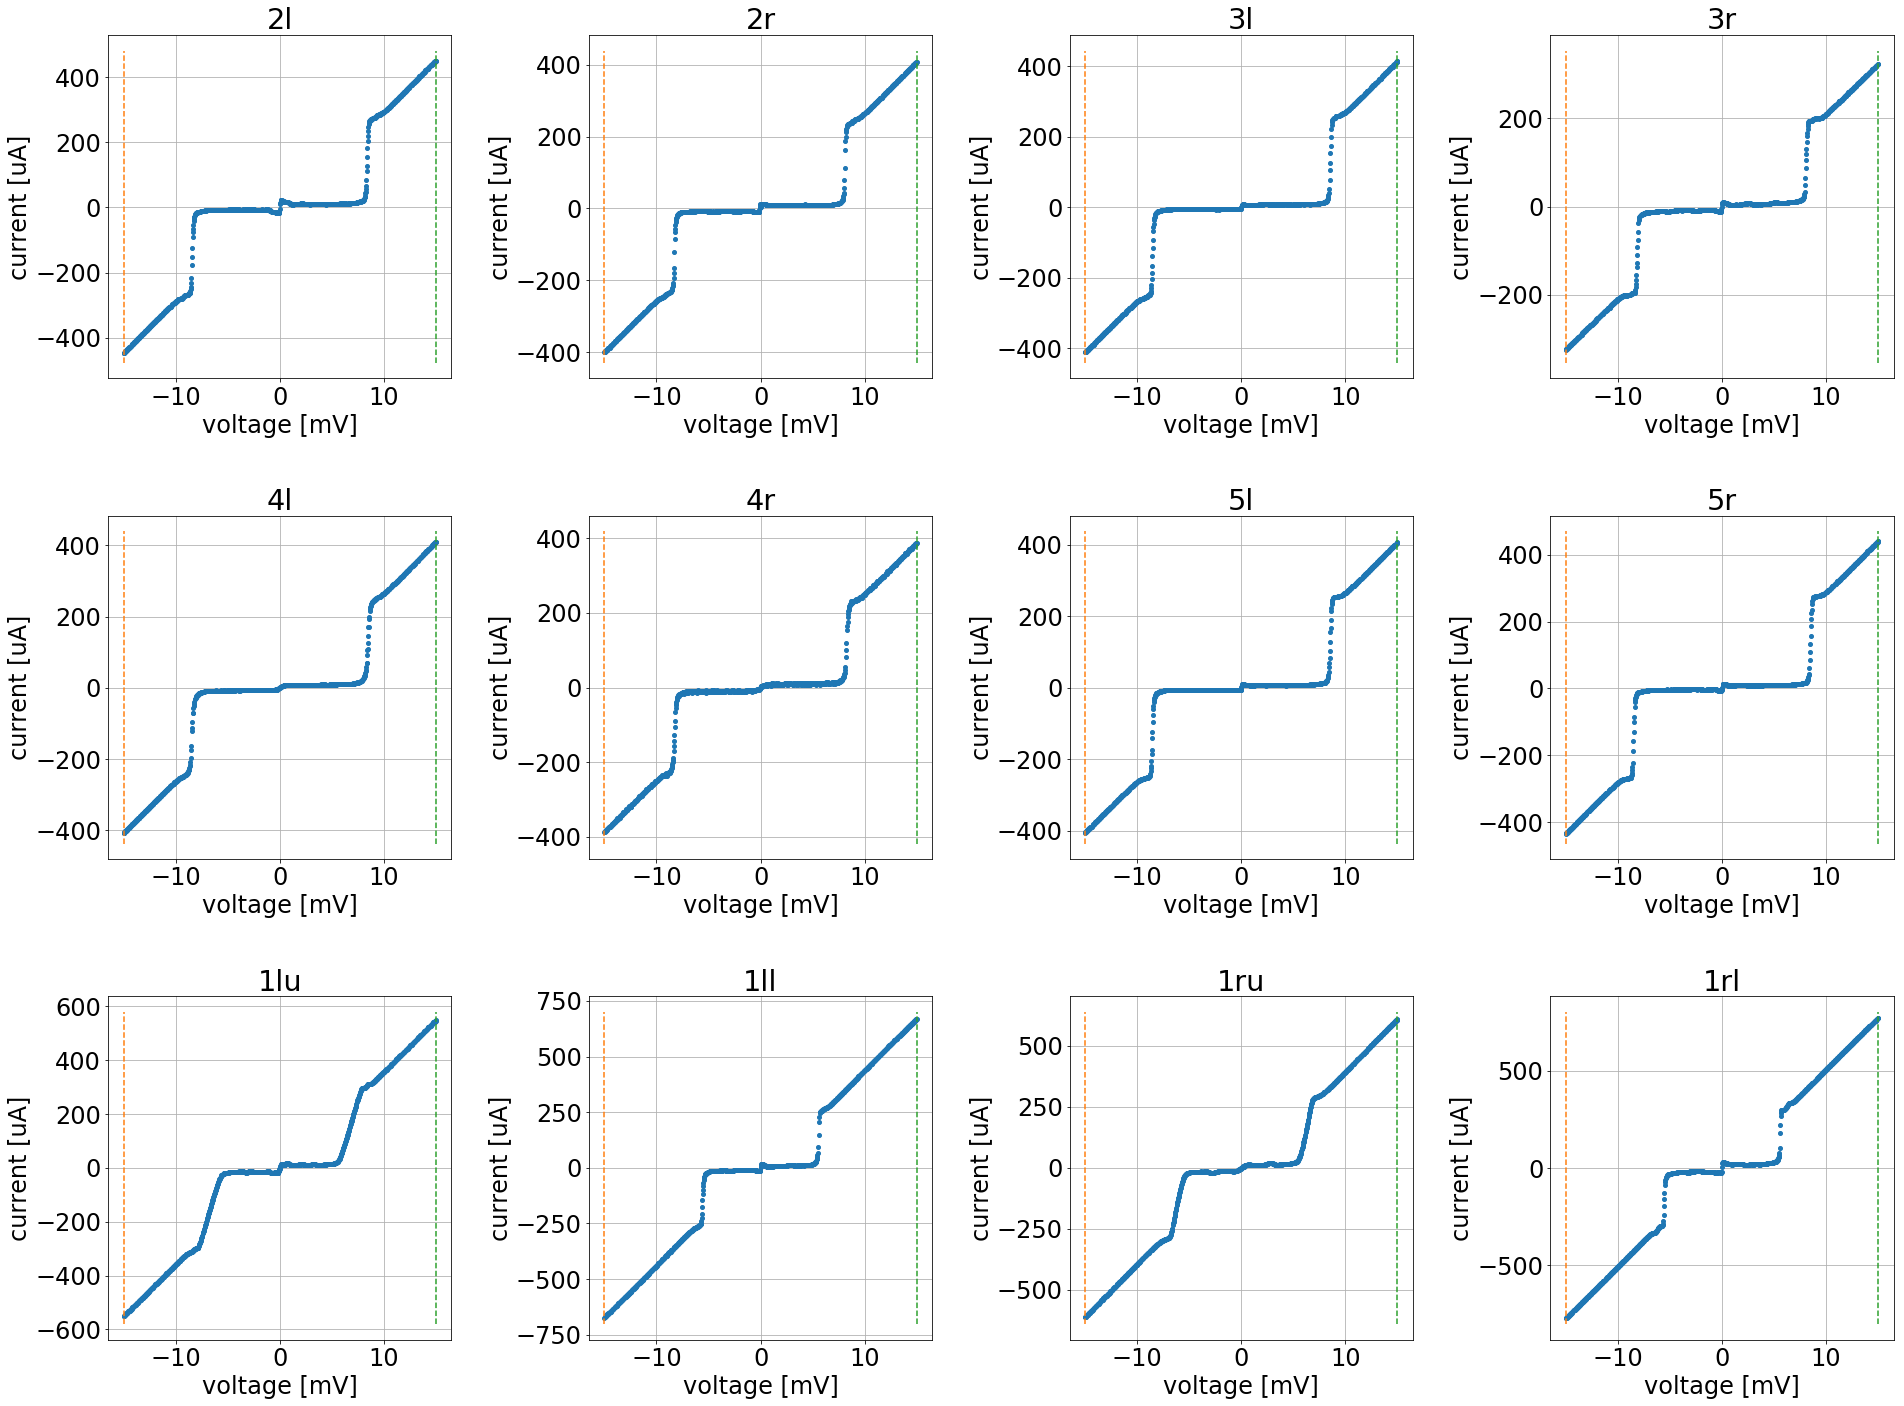

In [514]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam, _x, i in zip(ax, voltage3, current3, beam_list, x, range(12)):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
#     _ax.set_xlim(-15, 15)
#     _ax.set_ylim(-500, 500)    
    _ax.plot([-15., -15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.plot([15., 15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)

matplotlib.pyplot.show()

In [515]:
for i, beam in enumerate(beam_list):
    print('----')
    print('beam : {}'.format(beam))
    print('offset = ({0:.2f} mV, {1:.2f} uA)'.format(p[0][i], p[1][i]))

----
beam : 2l
offset = (-0.11 mV, -11.15 uA)
----
beam : 2r
offset = (0.81 mV, -8.35 uA)
----
beam : 3l
offset = (-0.27 mV, -13.64 uA)
----
beam : 3r
offset = (0.03 mV, -5.69 uA)
----
beam : 4l
offset = (-0.06 mV, -9.47 uA)
----
beam : 4r
offset = (-0.11 mV, -5.90 uA)
----
beam : 5l
offset = (0.40 mV, 0.22 uA)
----
beam : 5r
offset = (-0.22 mV, -20.18 uA)
----
beam : 1lu
offset = (-0.07 mV, -13.72 uA)
----
beam : 1ll
offset = (-0.08 mV, -0.98 uA)
----
beam : 1ru
offset = (-0.21 mV, -11.08 uA)
----
beam : 1rl
offset = (-0.03 mV, -5.05 uA)


In [516]:
for i, beam in enumerate(beam_list):
    print('----')
    print('beam : {}'.format(beam))
    print('bias offset = {0:.2f} mV'.format(bias_offset[i]))

----
beam : 2l
bias offset = 0.02 mV
----
beam : 2r
bias offset = 0.08 mV
----
beam : 3l
bias offset = -0.01 mV
----
beam : 3r
bias offset = 0.02 mV
----
beam : 4l
bias offset = -0.01 mV
----
beam : 4r
bias offset = 0.00 mV
----
beam : 5l
bias offset = -0.00 mV
----
beam : 5r
bias offset = 0.01 mV
----
beam : 1lu
bias offset = -0.02 mV
----
beam : 1ll
bias offset = 0.00 mV
----
beam : 1ru
bias offset = -0.01 mV
----
beam : 1rl
bias offset = 0.00 mV


In [517]:
for i, beam in enumerate(beam_list):
    print('----')
    print('beam : {}'.format(beam))
    print('bias scale = {0:.2f}'.format(bias_scale_factor[i]))

----
beam : 2l
bias scale = 1.00
----
beam : 2r
bias scale = 1.00
----
beam : 3l
bias scale = 1.00
----
beam : 3r
bias scale = 1.00
----
beam : 4l
bias scale = 1.00
----
beam : 4r
bias scale = 1.00
----
beam : 5l
bias scale = 1.00
----
beam : 5r
bias scale = 1.00
----
beam : 1lu
bias scale = 1.00
----
beam : 1ll
bias scale = 1.00
----
beam : 1ru
bias scale = 1.00
----
beam : 1rl
bias scale = 1.00


In [518]:
# create bias launch

print('<launch>\n')

for ch, beam, offset, sf in zip(range(1, 5), beam_list[:4], bias_offset[:4], bias_scale_factor[:4]):
    print('\t<node name = "sis_vol_{0}_cmd"\n'\
              '\t            type = "relay.py"\n'\
              '\t            pkg = "nasco_system">\n'\
              '\t\t<remap from = "/cpz340816" to = "/cpz340816_rsw0_{1}_cmd" />\n'\
              '\t\t<remap from = "/sis_vol" to = "/sis_vol_{0}_cmd" />\n'\
              '\t\t<param name = "bias_offset" value = "{2:.3f}" />\n'\
              '\t\t<param name = "bias_scale_factor" value = "{3:.3f}" />\n'\
              '\t\t<param name = "config_file"\n'\
              '\t\t              value = "$(find nasco_system)/relay_conf/sis_vol_writer_correct.conf" />\n'\
              '\t</node>\n'
              .format(beam, ch, offset, sf))
    
for ch, beam, offset, sf in zip(range(1, 5), beam_list[4:8], bias_offset[4:8], bias_scale_factor[4:8]):
    print('\t<node name = "sis_vol_{0}_cmd"\n'\
              '\t            type = "relay.py"\n'\
              '\t            pkg = "nasco_system">\n'\
              '\t\t<remap from = "/cpz340816" to = "/cpz340816_rsw1_{1}_cmd" />\n'\
              '\t\t<remap from = "/sis_vol" to = "/sis_vol_{0}_cmd" />\n'\
              '\t\t<param name = "bias_offset" value = "{2:.3f}" />\n'\
              '\t\t<param name = "bias_scale_factor" value = "{3:.3f}" />\n'\
              '\t\t<param name = "config_file"\n'\
              '\t\t              value = "$(find nasco_system)/relay_conf/sis_vol_writer_correct.conf" />\n'\
              '\t</node>\n'
              .format(beam, ch, offset, sf))
    
for ch, beam, offset, sf in zip(range(1, 5), beam_list[8:12], bias_offset[8:12], bias_scale_factor[8:12]):
    print('\t<node name = "sis_vol_{0}_cmd"\n'\
              '\t            type = "relay.py"\n'\
              '\t            pkg = "nasco_system">\n'\
              '\t\t<remap from = "/cpz340816" to = "/cpz340816_rsw2_{1}_cmd" />\n'\
              '\t\t<remap from = "/sis_vol" to = "/sis_vol_{0}_cmd" />\n'\
              '\t\t<param name = "bias_offset" value = "{2:.3f}" />\n'\
              '\t\t<param name = "bias_scale_factor" value = "{3:.3f}" />\n'\
              '\t\t<param name = "config_file"\n'\
              '\t\t              value = "$(find nasco_system)/relay_conf/sis_vol_writer_correct.conf" />\n'\
              '\t</node>\n'
              .format(beam, ch, offset, sf))
    
print('</launch>')

<launch>

	<node name = "sis_vol_2l_cmd"
	            type = "relay.py"
	            pkg = "nasco_system">
		<remap from = "/cpz340816" to = "/cpz340816_rsw0_1_cmd" />
		<remap from = "/sis_vol" to = "/sis_vol_2l_cmd" />
		<param name = "bias_offset" value = "0.017" />
		<param name = "bias_scale_factor" value = "0.999" />
		<param name = "config_file"
		              value = "$(find nasco_system)/relay_conf/sis_vol_writer_correct.conf" />
	</node>

	<node name = "sis_vol_2r_cmd"
	            type = "relay.py"
	            pkg = "nasco_system">
		<remap from = "/cpz340816" to = "/cpz340816_rsw0_2_cmd" />
		<remap from = "/sis_vol" to = "/sis_vol_2r_cmd" />
		<param name = "bias_offset" value = "0.083" />
		<param name = "bias_scale_factor" value = "1.000" />
		<param name = "config_file"
		              value = "$(find nasco_system)/relay_conf/sis_vol_writer_correct.conf" />
	</node>

	<node name = "sis_vol_3l_cmd"
	            type = "relay.py"
	            pkg = "nasco_system">
		<re

In [519]:
# create voltage monitor launch

print('<launch>\n')

for ch, beam, offset in zip(range(1, 13), beam_list, p[0]):
    print('\t<node name = "sis_vol_{0}"\n'\
              '\t            type = "relay.py"\n'\
              '\t            pkg = "nasco_system">\n'\
              '\t\t<remap from = "/cpz3177" to = "/cpz3177_rsw0_diff{1}" />\n'\
              '\t\t<remap from = "/sis_vol" to = "/sis_vol_{0}" />\n'\
              '\t\t<param name = "monitor_voltage_offset" value = "{2:.3f}" />\n'\
              '\t\t<param name = "config_file"\n'\
              '\t\t              value = "$(find nasco_system)/relay_conf/sis_vol_reader_correct.conf" />\n'\
              '\t</node>\n'
              .format(beam, 2 * ch - 1, offset))
    
print('</launch>')    

<launch>

	<node name = "sis_vol_2l"
	            type = "relay.py"
	            pkg = "nasco_system">
		<remap from = "/cpz3177" to = "/cpz3177_rsw0_diff1" />
		<remap from = "/sis_vol" to = "/sis_vol_2l" />
		<param name = "monitor_voltage_offset" value = "-0.115" />
		<param name = "config_file"
		              value = "$(find nasco_system)/relay_conf/sis_vol_reader_correct.conf" />
	</node>

	<node name = "sis_vol_2r"
	            type = "relay.py"
	            pkg = "nasco_system">
		<remap from = "/cpz3177" to = "/cpz3177_rsw0_diff3" />
		<remap from = "/sis_vol" to = "/sis_vol_2r" />
		<param name = "monitor_voltage_offset" value = "0.808" />
		<param name = "config_file"
		              value = "$(find nasco_system)/relay_conf/sis_vol_reader_correct.conf" />
	</node>

	<node name = "sis_vol_3l"
	            type = "relay.py"
	            pkg = "nasco_system">
		<remap from = "/cpz3177" to = "/cpz3177_rsw0_diff5" />
		<remap from = "/sis_vol" to = "/sis_vol_3l" />
		<param name 

In [520]:
# create current monitor launch

print('<launch>\n')

for ch, beam, offset in zip(range(1, 13), beam_list, p[1]):
    print('\t<node name = "sis_cur_{0}"\n'\
              '\t            type = "relay.py"\n'\
              '\t            pkg = "nasco_system">\n'\
              '\t\t<remap from = "/cpz3177" to = "/cpz3177_rsw0_diff{1}" />\n'\
              '\t\t<remap from = "/sis_cur" to = "/sis_cur_{0}" />\n'\
              '\t\t<param name = "monitor_current_offset" value = "{2:.3f}" />\n'\
              '\t\t<param name = "config_file"\n'\
              '\t\t              value = "$(find nasco_system)/relay_conf/sis_cur_reader_correct.conf" />\n'\
              '\t</node>\n'
              .format(beam, 2 * ch, offset))
    
print('</launch>')    

<launch>

	<node name = "sis_cur_2l"
	            type = "relay.py"
	            pkg = "nasco_system">
		<remap from = "/cpz3177" to = "/cpz3177_rsw0_diff2" />
		<remap from = "/sis_cur" to = "/sis_cur_2l" />
		<param name = "monitor_current_offset" value = "-11.153" />
		<param name = "config_file"
		              value = "$(find nasco_system)/relay_conf/sis_cur_reader_correct.conf" />
	</node>

	<node name = "sis_cur_2r"
	            type = "relay.py"
	            pkg = "nasco_system">
		<remap from = "/cpz3177" to = "/cpz3177_rsw0_diff4" />
		<remap from = "/sis_cur" to = "/sis_cur_2r" />
		<param name = "monitor_current_offset" value = "-8.355" />
		<param name = "config_file"
		              value = "$(find nasco_system)/relay_conf/sis_cur_reader_correct.conf" />
	</node>

	<node name = "sis_cur_3l"
	            type = "relay.py"
	            pkg = "nasco_system">
		<remap from = "/cpz3177" to = "/cpz3177_rsw0_diff6" />
		<remap from = "/sis_cur" to = "/sis_cur_3l" />
		<param nam